<a href="https://colab.research.google.com/github/youngpaper1115/card_churnout/blob/main/02_Modeling_ver4_0(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L사 고객 데이터 분석을 통한 이탈율 예측

## 데이터 불러오기 / 필요 라이브러리 임포트

In [ ]:
# pip install pandas

In [ ]:
# pip install sklearn

In [ ]:
# pip install imblearn

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [ ]:
# pip install statsmodels

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings    # 경고문구 지우기

In [ ]:
# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score    # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트 라이브러리
import warnings    # 경고문구 지우기

### 한글 폰트 적용

In [ ]:
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
import os

path = os.getcwd()
print(path)

/home/ljy1115


### raw data 불러오기

In [ ]:
data  = pd.read_csv('/home/ljy1115/project/digital_user_check_202205201338.csv',sep='|')

In [ ]:
data.head()

,SVC_USE_DAYS_GRP,Unnamed: 1,MEDIA_NM_GRP,Unnamed: 3,PROD_NM_GRP,Unnamed: 5,PROD_OLD_YN,Unnamed: 7,AGMT_KIND_NM,Unnamed: 9,STB_RES_1M_YN,Unnamed: 11,SVOD_SCRB_CNT_GRP,Unnamed: 13,PAID_CHNL_SCRB_CNT_GRP,Unnamed: 15,SCRB_PATH_NM_GRP,Unnamed: 17,AGMT_END_SEG,Unnamed: 19,AGMT_END_YMD,Unnamed: 21,TOTAL_USED_DAYS,Unnamed: 23,TV_SCRB,Unnamed: 25,ANALOG_SCRB,Unnamed: 27,DIGITAL_SCRB,Unnamed: 29,TOTAL_INTERNET_SCRB,Unnamed: 31,GIGA_INTERNET_SCRB,Unnamed: 33,BUNDLE_YN,Unnamed: 35,DIGITAL_GIGA_YN,Unnamed: 37,DIGITAL_ALOG_YN,Unnamed: 39,TV_I_CNT,Unnamed: 41,VOC_TOTAL_MONTH1_YN,Unnamed: 43,EMAIL_RECV_CLS_NM,Unnamed: 45,SMS_SEND_CLS_NM,Unnamed: 47,CH_HH_AVG_MONTH1,Unnamed: 49,CH_TMS_1_2_INCREASE_YN,Unnamed: 51,CH_FAV_RANK1,Unnamed: 53,KIDS_USE_PV_MONTH1,Unnamed: 55,KIDS_USE_YN_MONTH1,Unnamed: 57,KIDS_VOD_CNT_MONTH1,Unnamed: 59,TOT_AMT_MONTH1,Unnamed: 61,TOT_AMT_3MM,Unnamed: 63,NFX_USE_YN,Unnamed: 65,YTB_USE_YN,Unnamed: 67,canel_yn
0,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,0건,NaN,1건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20181013,NaN,2453,NaN,2,NaN,0,NaN,2,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,2.00000,NaN,N,NaN,수신,NaN,수신,NaN,13.77000,NaN,비슷,NaN,기타,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
1,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20170804,NaN,2611,NaN,5,NaN,0,NaN,5,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,5.00000,NaN,N,NaN,수신,NaN,수신,NaN,5.80000,NaN,비슷,NaN,기타,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
2,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,약정승계,NaN,Y,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20171030,NaN,2526,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,1.00000,NaN,N,NaN,수신,NaN,수신,NaN,0.00000,NaN,비슷,NaN,기타,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
3,36개월 이상,NaN,UHD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,1건,NaN,0건,NaN,일반상담,NaN,약정 만료 전 12개월이상,NaN,20230204,NaN,3851,NaN,3,NaN,0,NaN,3,NaN,1,NaN,0,NaN,Y,NaN,N,NaN,N,NaN,4.00000,NaN,N,NaN,수신,NaN,수신,NaN,6.43000,NaN,감소,NaN,기타,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
4,36개월 이상,NaN,HD,NaN,베이직,NaN,N,NaN,약정승계,NaN,N,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20130720,NaN,3170,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,1.00000,NaN,N,NaN,전체거부,NaN,수신,NaN,5.21000,NaN,비슷,NaN,KBS1,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n


In [ ]:
data.shape

(1749907, 69)

In [ ]:
data.columns

Index(['SVC_USE_DAYS_GRP', 'Unnamed: 1', 'MEDIA_NM_GRP', 'Unnamed: 3',
       'PROD_NM_GRP', 'Unnamed: 5', 'PROD_OLD_YN', 'Unnamed: 7',
       'AGMT_KIND_NM', 'Unnamed: 9', 'STB_RES_1M_YN', 'Unnamed: 11',
       'SVOD_SCRB_CNT_GRP', 'Unnamed: 13', 'PAID_CHNL_SCRB_CNT_GRP',
       'Unnamed: 15', 'SCRB_PATH_NM_GRP', 'Unnamed: 17', 'AGMT_END_SEG',
       'Unnamed: 19', 'AGMT_END_YMD', 'Unnamed: 21', 'TOTAL_USED_DAYS',
       'Unnamed: 23', 'TV_SCRB', 'Unnamed: 25', 'ANALOG_SCRB', 'Unnamed: 27',
       'DIGITAL_SCRB', 'Unnamed: 29', 'TOTAL_INTERNET_SCRB', 'Unnamed: 31',
       'GIGA_INTERNET_SCRB', 'Unnamed: 33', 'BUNDLE_YN', 'Unnamed: 35',
       'DIGITAL_GIGA_YN', 'Unnamed: 37', 'DIGITAL_ALOG_YN', 'Unnamed: 39',
       'TV_I_CNT', 'Unnamed: 41', 'VOC_TOTAL_MONTH1_YN', 'Unnamed: 43',
       'EMAIL_RECV_CLS_NM', 'Unnamed: 45', 'SMS_SEND_CLS_NM', 'Unnamed: 47',
       'CH_HH_AVG_MONTH1', 'Unnamed: 49', 'CH_TMS_1_2_INCREASE_YN',
       'Unnamed: 51', 'CH_FAV_RANK1', 'Unnamed: 53', 'KIDS_USE_

### df 데이터프레임 생성

In [ ]:
df = data.copy()

### Unnamed 컬럼 지우기

In [ ]:
df.drop(df.columns[[i for i in range(1, 68, 2)]], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP', 'PROD_OLD_YN',
       'AGMT_KIND_NM', 'STB_RES_1M_YN', 'SVOD_SCRB_CNT_GRP',
       'PAID_CHNL_SCRB_CNT_GRP', 'SCRB_PATH_NM_GRP', 'AGMT_END_SEG',
       'AGMT_END_YMD', 'TOTAL_USED_DAYS', 'TV_SCRB', 'ANALOG_SCRB',
       'DIGITAL_SCRB', 'TOTAL_INTERNET_SCRB', 'GIGA_INTERNET_SCRB',
       'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN', 'TV_I_CNT',
       'VOC_TOTAL_MONTH1_YN', 'EMAIL_RECV_CLS_NM', 'SMS_SEND_CLS_NM',
       'CH_HH_AVG_MONTH1', 'CH_TMS_1_2_INCREASE_YN', 'CH_FAV_RANK1',
       'KIDS_USE_PV_MONTH1', 'KIDS_USE_YN_MONTH1', 'KIDS_VOD_CNT_MONTH1',
       'TOT_AMT_MONTH1', 'TOT_AMT_3MM', 'NFX_USE_YN', 'YTB_USE_YN',
       'canel_yn'],
      dtype='object')

In [ ]:
df.head()

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_SCRB_CNT_GRP,SCRB_PATH_NM_GRP,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,VOC_TOTAL_MONTH1_YN,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_TMS_1_2_INCREASE_YN,CH_FAV_RANK1,KIDS_USE_PV_MONTH1,KIDS_USE_YN_MONTH1,KIDS_VOD_CNT_MONTH1,TOT_AMT_MONTH1,TOT_AMT_3MM,NFX_USE_YN,YTB_USE_YN,canel_yn
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,2,0,2,0,0,N,N,N,2.00000,N,수신,수신,13.77000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,5,0,5,0,0,N,N,N,5.00000,N,수신,수신,5.80000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,1,0,1,0,0,N,N,N,1.00000,N,수신,수신,0.00000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,3,0,3,1,0,Y,N,N,4.00000,N,수신,수신,6.43000,감소,기타,0.00000,N,0.00000,0,0,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,1,0,1,0,0,N,N,N,1.00000,N,전체거부,수신,5.21000,비슷,KBS1,0.00000,N,0.00000,0,0,N,N,n


In [ ]:
col_names = '''서비스이용일그룹
미디어그룹명
상품명글룹
구상품여부
약정종류
셑탑1개월유지여부
SVOD가입건수
유료채널가입그룹
가입경로명
약정종료
약정종료년월
총이용일수
TV가입
아날로그가입
디지털가입
총인터넷가입
기가인터넷가입건수
번들상품가입여부
디지털기가가입여부
디지털아날로그여부
TV인터넷가입건수
VOC1개월발생여부
이메일수신분류명
SMS수신불류명
채널시간대별평균1달시간
채널이용증가여부
선호채널
아이들나라PV
아이들나라이용여부
아이들나라VOD이용여부
1달이용금액
3달이용금액
넷플릭시이용여부
유튜브이용여부
해지여부'''

In [ ]:
names = col_names.split('\n')

In [ ]:
names

['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '구상품여부',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 '약정종료년월',
 '총이용일수',
 'TV가입',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '번들상품가입여부',
 '디지털기가가입여부',
 '디지털아날로그여부',
 'TV인터넷가입건수',
 'VOC1개월발생여부',
 '이메일수신분류명',
 'SMS수신불류명',
 '채널시간대별평균1달시간',
 '채널이용증가여부',
 '선호채널',
 '아이들나라PV',
 '아이들나라이용여부',
 '아이들나라VOD이용여부',
 '1달이용금액',
 '3달이용금액',
 '넷플릭시이용여부',
 '유튜브이용여부',
 '해지여부']

### 변수명 한글로 변경

In [ ]:
df_kor = df.copy()

In [ ]:
df_kor.columns = names

In [ ]:
df_kor.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,총이용일수,TV가입,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,TV인터넷가입건수,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널시간대별평균1달시간,채널이용증가여부,선호채널,아이들나라PV,아이들나라이용여부,아이들나라VOD이용여부,1달이용금액,3달이용금액,넷플릭시이용여부,유튜브이용여부,해지여부
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,2,0,2,0,0,N,N,N,2.00000,N,수신,수신,13.77000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,5,0,5,0,0,N,N,N,5.00000,N,수신,수신,5.80000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,1,0,1,0,0,N,N,N,1.00000,N,수신,수신,0.00000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,3,0,3,1,0,Y,N,N,4.00000,N,수신,수신,6.43000,감소,기타,0.00000,N,0.00000,0,0,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,1,0,1,0,0,N,N,N,1.00000,N,전체거부,수신,5.21000,비슷,KBS1,0.00000,N,0.00000,0,0,N,N,n


## 한글컬럼 데이터 엑셀변환

In [ ]:
df_kor.to_csv('/home/ljy1115/project/df_kor.csv')

# 한글컬럼 데이터(df_kor)로 시작

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings    # 경고문구 지우기

In [ ]:
# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score    # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트 라이브러리
import warnings    # 경고문구 지우기

In [ ]:
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
import os

path = os.getcwd()
print(path)

/home/ljy1115


In [ ]:
df_kor  = pd.read_csv('/home/ljy1115/project/df_kor.csv',sep=',')

In [ ]:
df_kor.head()

,Unnamed: 0,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,총이용일수,TV가입,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,TV인터넷가입건수,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널시간대별평균1달시간,채널이용증가여부,선호채널,아이들나라PV,아이들나라이용여부,아이들나라VOD이용여부,1달이용금액,3달이용금액,넷플릭시이용여부,유튜브이용여부,해지여부
0,0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,2,0,2,0,0,N,N,N,2.00000,N,수신,수신,13.77000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
1,1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,5,0,5,0,0,N,N,N,5.00000,N,수신,수신,5.80000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
2,2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,1,0,1,0,0,N,N,N,1.00000,N,수신,수신,0.00000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
3,3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,3,0,3,1,0,Y,N,N,4.00000,N,수신,수신,6.43000,감소,기타,0.00000,N,0.00000,0,0,N,N,n
4,4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,1,0,1,0,0,N,N,N,1.00000,N,전체거부,수신,5.21000,비슷,KBS1,0.00000,N,0.00000,0,0,N,N,n


## unnamed 칼럼 삭제

In [ ]:
df_kor.drop(df_kor[['Unnamed: 0']], axis = 1, inplace = True)

In [ ]:
df_kor.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,총이용일수,TV가입,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,TV인터넷가입건수,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널시간대별평균1달시간,채널이용증가여부,선호채널,아이들나라PV,아이들나라이용여부,아이들나라VOD이용여부,1달이용금액,3달이용금액,넷플릭시이용여부,유튜브이용여부,해지여부
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,2,0,2,0,0,N,N,N,2.00000,N,수신,수신,13.77000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,5,0,5,0,0,N,N,N,5.00000,N,수신,수신,5.80000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,1,0,1,0,0,N,N,N,1.00000,N,수신,수신,0.00000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,3,0,3,1,0,Y,N,N,4.00000,N,수신,수신,6.43000,감소,기타,0.00000,N,0.00000,0,0,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,1,0,1,0,0,N,N,N,1.00000,N,전체거부,수신,5.21000,비슷,KBS1,0.00000,N,0.00000,0,0,N,N,n


### 종속변수 비율 확인

In [ ]:
df_kor['해지여부'].value_counts(normalize = True, dropna=False)

n   0.99328
y   0.00672
Name: 해지여부, dtype: float64

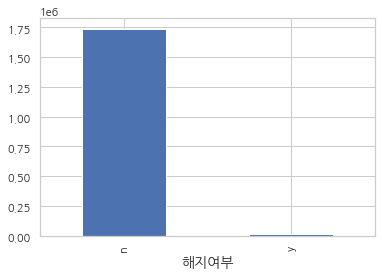

In [ ]:
df_kor['해지여부'].value_counts().plot(kind='bar')
plt.xlabel('해지여부', fontsize=14,fontproperties=fontprop)
plt.show()

In [ ]:
# import sys
# line = int(sys.stdin.readline())
# lst = [sys.stdin.readline().strip()]
# if len(lst) < 2:
#     pass
# # n = int(float((sys.stdin.readline())))
# # lst = [[sys.stdin.readline().strip() for i in range(1, n)]]
# for sub in lst:
#     a = sub[0]
#     b = sub[1]
#     c = sub[2]
#     x = sub[3]
#     y = sub[4]
#     if x <= a and y <= b:
#         print("YES")
#     elif x > a and y <= b:
#         if x > c:
#             print("NO")
#         else:
#             print("YES")
#     elif x <= a and y > b:
#         if y > c:
#             print("NO")
#         else:
#             print("YES")
#     else:
#         x_and_y = x + y
#         if x_and_y > c:
#             print("NO")
#         else:
#             print("YES")

In [ ]:
# if max(0, x-a) + max(0, y-b) > c
#     print("NO")

### 변수 타입 확인

In [ ]:
df_kor.dtypes

서비스이용일그룹         object
미디어그룹명           object
상품명글룹            object
구상품여부            object
약정종류             object
셑탑1개월유지여부        object
SVOD가입건수         object
유료채널가입그룹         object
가입경로명            object
약정종료             object
약정종료년월           object
총이용일수             int64
TV가입              int64
아날로그가입            int64
디지털가입             int64
총인터넷가입            int64
기가인터넷가입건수         int64
번들상품가입여부         object
디지털기가가입여부        object
디지털아날로그여부        object
TV인터넷가입건수       float64
VOC1개월발생여부       object
이메일수신분류명         object
SMS수신불류명         object
채널시간대별평균1달시간    float64
채널이용증가여부         object
선호채널             object
아이들나라PV         float64
아이들나라이용여부        object
아이들나라VOD이용여부    float64
1달이용금액            int64
3달이용금액            int64
넷플릭시이용여부         object
유튜브이용여부          object
해지여부             object
dtype: object

In [ ]:
# 35개 컬럼, 170만개 데이터
df_kor.shape

(1749907, 35)

In [ ]:
df_kor.describe()

,총이용일수,TV가입,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,TV인터넷가입건수,채널시간대별평균1달시간,아이들나라PV,아이들나라VOD이용여부,1달이용금액,3달이용금액
count,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000
mean,2340.10858,1.76128,0.03110,1.73018,0.35913,0.03956,2.12040,5.23655,0.33531,1.05912,0.00000,0.00000
std,976.06318,2.42158,0.21168,2.41194,0.95881,0.21219,3.01009,4.26755,2.69018,19.46461,0.00000,0.00000
min,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1708.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.70000,0.00000,0.00000,0.00000,0.00000
50%,2452.00000,2.00000,0.00000,1.00000,0.00000,0.00000,2.00000,4.50000,0.00000,0.00000,0.00000,0.00000
75%,3041.00000,2.00000,0.00000,2.00000,1.00000,0.00000,2.00000,8.06000,0.00000,0.00000,0.00000,0.00000
max,44467.00000,118.00000,29.00000,118.00000,102.00000,21.00000,201.00000,29.35000,547.00000,7120.00000,0.00000,0.00000


In [ ]:
df_kor.nunique()

서비스이용일그룹           5
미디어그룹명             2
상품명글룹              6
구상품여부              2
약정종류               6
셑탑1개월유지여부          2
SVOD가입건수           4
유료채널가입그룹           4
가입경로명             10
약정종료              10
약정종료년월          5803
총이용일수           8029
TV가입              53
아날로그가입            20
디지털가입             53
총인터넷가입            24
기가인터넷가입건수          9
번들상품가입여부           2
디지털기가가입여부          2
디지털아날로그여부          2
TV인터넷가입건수         61
VOC1개월발생여부         2
이메일수신분류명           4
SMS수신불류명           4
채널시간대별평균1달시간    2304
채널이용증가여부           4
선호채널              15
아이들나라PV          192
아이들나라이용여부          2
아이들나라VOD이용여부     815
1달이용금액             1
3달이용금액             1
넷플릭시이용여부           1
유튜브이용여부            1
해지여부               2
dtype: int64

### null 값 여부 확인

In [ ]:
df_kor.isnull().sum()

서비스이용일그룹        0
미디어그룹명          0
상품명글룹           0
구상품여부           0
약정종류            6
셑탑1개월유지여부       0
SVOD가입건수        0
유료채널가입그룹        0
가입경로명           0
약정종료            0
약정종료년월          2
총이용일수           0
TV가입            0
아날로그가입          0
디지털가입           0
총인터넷가입          0
기가인터넷가입건수       0
번들상품가입여부        0
디지털기가가입여부       0
디지털아날로그여부       0
TV인터넷가입건수       0
VOC1개월발생여부      0
이메일수신분류명        0
SMS수신불류명        0
채널시간대별평균1달시간    0
채널이용증가여부        0
선호채널            0
아이들나라PV         0
아이들나라이용여부       0
아이들나라VOD이용여부    0
1달이용금액          0
3달이용금액          0
넷플릭시이용여부        0
유튜브이용여부         0
해지여부            0
dtype: int64

In [ ]:
df_kor.isnull().sum().sum()

8

### NaN 값 삭제

In [ ]:
df_kor = df_kor.dropna(axis=0)

In [ ]:
df_kor.isnull().sum().sum()

0

### 연속형 변수 boxplot확인

In [ ]:
# 범주형 변수와 연속형 변수 구분한 리스트 생성
num = df_kor.select_dtypes('number').columns.to_list()
cat = df_kor.select_dtypes('object').columns.to_list()

In [ ]:
num

['총이용일수',
 'TV가입',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 'TV인터넷가입건수',
 '채널시간대별평균1달시간',
 '아이들나라PV',
 '아이들나라VOD이용여부',
 '1달이용금액',
 '3달이용금액']

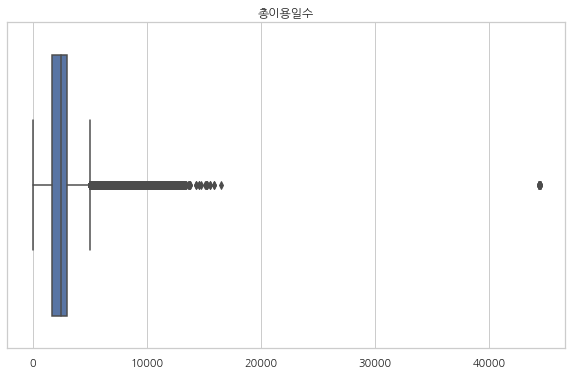

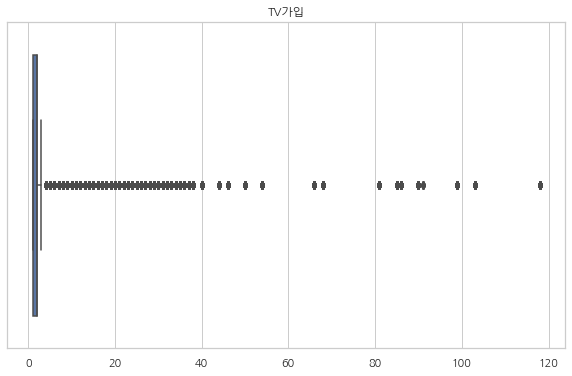

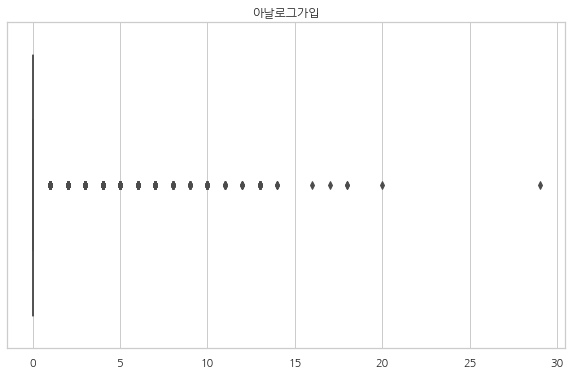

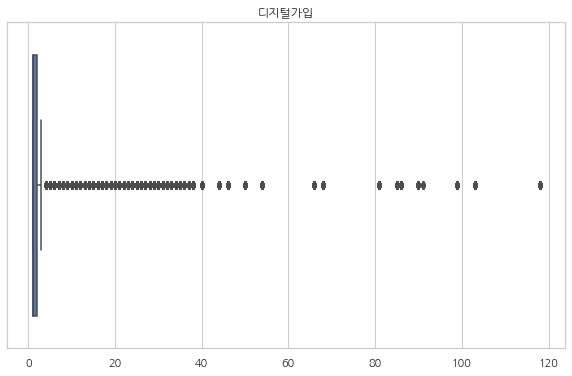

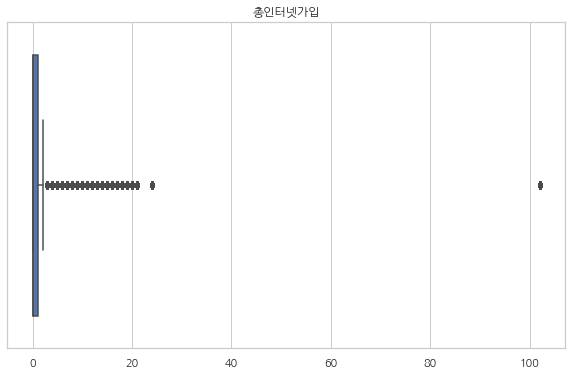

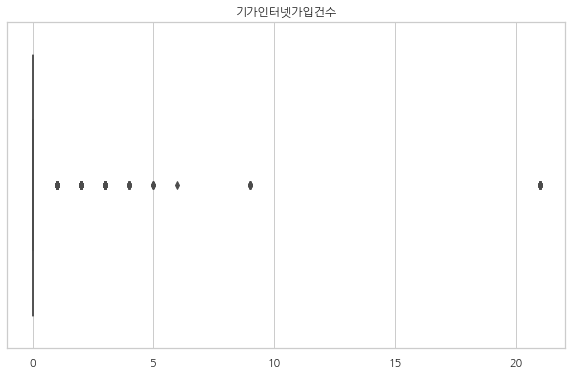

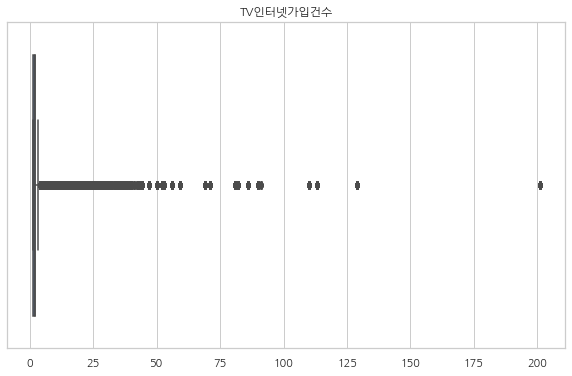

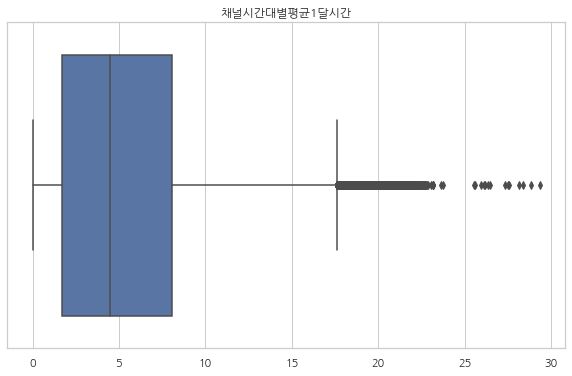

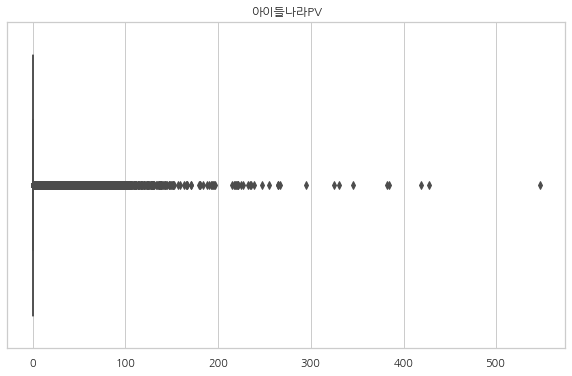

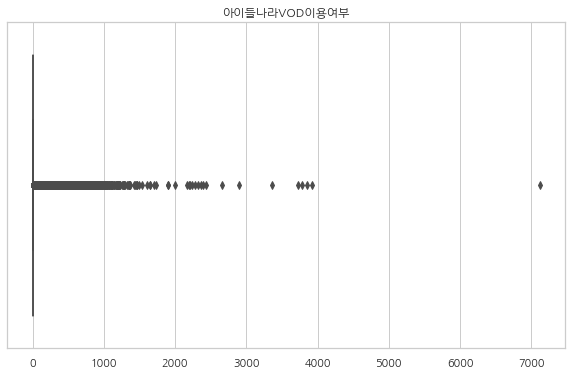

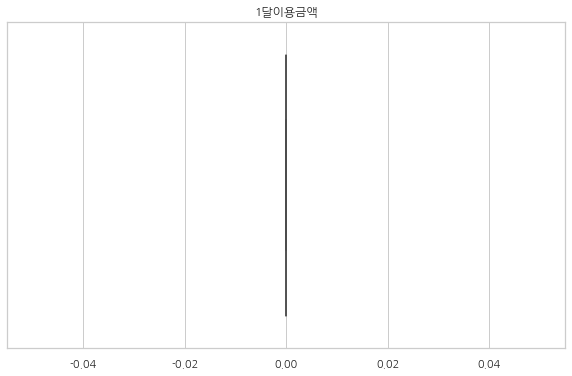

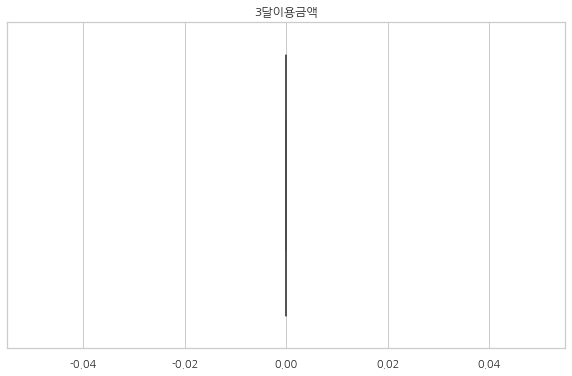

In [ ]:
for i in num:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_kor, x=df_kor[i])
    plt.title(i)
    plt.xlabel('')
    plt.show

### 연속형변수 범주화

#### 총이용일수 범주화

In [ ]:
Q1 = df_kor['총이용일수'].describe()['25%']  # Q1 은 1/4 즉, 백분위수에서 25%
Q3 = df_kor['총이용일수'].describe()['75%']  # Q3 은 3/4 즉, 백분위수에서 75%
IQR = Q3 - Q1  # IQR(Interquartile range) 4분위 범위는 Q3-Q1
Q2 = df_kor['총이용일수'].describe()['50%']  # Q2 (중앙값) 백분위수 50%

print("Q1  :",Q1)
print("Q3  :",Q3)
print("IQR :",IQR)
print("Q2  :",Q2)

Q1  : 1708.0
Q3  : 3041.0
IQR : 1333.0
Q2  : 2452.0


In [ ]:
# 총이용일수 범주화
df_kor['총이용일수_Category'] = pd.cut(df_kor['총이용일수'], bins = [0, 1708, 2452, 3041, np.inf], labels=['0~1708', '1709~2452', '2453~3041', '3042~'])
df_kor.drop(['총이용일수'], axis=1, inplace = True)

In [ ]:
df_kor[['총이용일수_Category']].tail()

,총이용일수_Category
1749902,1709~2452
1749903,1709~2452
1749904,1709~2452
1749905,1709~2452
1749906,1709~2452


#### 채널시간대별평균1달시간 범주화

In [ ]:
df_kor['채널시간대별평균1달시간'].dtype

dtype('float64')

In [ ]:
Q1 = df_kor['채널시간대별평균1달시간'].describe()['25%']  # Q1 은 1/4 즉, 백분위수에서 25%
Q3 = df_kor['채널시간대별평균1달시간'].describe()['75%']  # Q3 은 3/4 즉, 백분위수에서 75%
IQR = Q3 - Q1  # IQR(Interquartile range) 4분위 범위는 Q3-Q1
Q2 = df_kor['채널시간대별평균1달시간'].describe()['50%']  # Q2 (중앙값) 백분위수 50%

print("Q1  :",Q1)
print("Q3  :",Q3)
print("IQR :",IQR)
print("Q2  :",Q2)

Q1  : 1.7
Q3  : 8.06
IQR : 6.36
Q2  : 4.5


In [ ]:
# 채널시간대별평균1달시간 범주화
df_kor['채널시간대별평균1달시간_Category'] = pd.cut(df_kor['채널시간대별평균1달시간'], bins = [-np.inf, 1.7, 4.5, 8.06, np.inf], labels=['0~2', '3~4', '5~7', '8~'])
# df_kor.drop(['채널시간대별평균1달시간'], axis=1, inplace = True)

In [ ]:
df_kor[['채널시간대별평균1달시간_Category','채널시간대별평균1달시간']].head()

,채널시간대별평균1달시간_Category,채널시간대별평균1달시간
0,8~,13.77000
1,5~7,5.80000
2,0~2,0.00000
3,5~7,6.43000
4,5~7,5.21000


### 나머지 변수 범주화

In [ ]:
df_kor['TV가입'] = np.where(df_kor['TV가입'] == 1, '1건', np.where(df_kor['TV가입'] == 2, '2건', '3건 이상'))
df_kor['아날로그가입'] = np.where(df_kor['아날로그가입'] == 0, '0건', '1건 이상')
df_kor['디지털가입'] = np.where(df_kor['디지털가입'] == 1, '1건', np.where(df_kor['디지털가입'] == 2, '2건', '3건 이상'))
df_kor['총인터넷가입'] = np.where(df_kor['총인터넷가입'] == 0, '0건', np.where(df_kor['총인터넷가입'] == 1, '1건', '2건 이상'))
df_kor['기가인터넷가입건수'] = np.where(df_kor['기가인터넷가입건수'] == 0, '0건', '1건 이상')
df_kor['TV인터넷가입건수'] = np.where(df_kor['TV인터넷가입건수'] == 1, '1건', np.where(df_kor['TV인터넷가입건수'] == 2, '2건',
                                                               np.where(df_kor['TV인터넷가입건수'] == 3, '3건', '4건 이상')))
df_kor['아이들나라PV'] = np.where(df_kor['아이들나라PV'] == 0, '0건', '1건 이상')
df_kor['아이들나라VOD이용여부'] = np.where(df_kor['아이들나라VOD이용여부'] == 0, '0건', '1건 이상')

In [ ]:
df_kor.columns

Index(['서비스이용일그룹', '미디어그룹명', '상품명글룹', '구상품여부', '약정종류', '셑탑1개월유지여부', 'SVOD가입건수',
       '유료채널가입그룹', '가입경로명', '약정종료', '약정종료년월', 'TV가입', '아날로그가입', '디지털가입',
       '총인터넷가입', '기가인터넷가입건수', '번들상품가입여부', '디지털기가가입여부', '디지털아날로그여부',
       'TV인터넷가입건수', 'VOC1개월발생여부', '이메일수신분류명', 'SMS수신불류명', '채널시간대별평균1달시간',
       '채널이용증가여부', '선호채널', '아이들나라PV', '아이들나라이용여부', '아이들나라VOD이용여부', '1달이용금액',
       '3달이용금액', '넷플릭시이용여부', '유튜브이용여부', '해지여부', '총이용일수_Category',
       '채널시간대별평균1달시간_Category'],
      dtype='object')

In [ ]:
df_kor.nunique()

서비스이용일그룹                    5
미디어그룹명                      2
상품명글룹                       6
구상품여부                       2
약정종류                        6
셑탑1개월유지여부                   2
SVOD가입건수                    4
유료채널가입그룹                    4
가입경로명                      10
약정종료                       10
약정종료년월                   5803
TV가입                        3
아날로그가입                      2
디지털가입                       3
총인터넷가입                      3
기가인터넷가입건수                   2
번들상품가입여부                    2
디지털기가가입여부                   2
디지털아날로그여부                   2
TV인터넷가입건수                   4
VOC1개월발생여부                  2
이메일수신분류명                    4
SMS수신불류명                    4
채널시간대별평균1달시간             2304
채널이용증가여부                    4
선호채널                       15
아이들나라PV                     2
아이들나라이용여부                   2
아이들나라VOD이용여부                2
1달이용금액                      1
3달이용금액                      1
넷플릭시이용여부                    1
유튜브이용여부                     1
해지여부      

In [ ]:
# # 100분위 수 15
# print(df_kor['총이용일수'].quantile(q= 15/100))
# # 10분위수 5
# print(df_kor['총이용일수'].quantile(q= 5/10))
# # 10분위 수 10
# print(df_kor['총이용일수'].quantile(q= 10/10))

In [ ]:
# # 10에서 1까지 역순으로 반복
# for i in range(10,0,-1):
#     # qi = 얼마
#     globals()[f'q{i}'] = df_kor['총이용일수'].quantile(q = i/10)
#     # 얼마까지 몇분위인지 출력
#     print(f'q{i}:  ~ ' + str(round(globals()[f'q{i}'])))
#     # df의 행마다 돌아가며 반복, qi값보다 작으면 'qi' 할당
#     for j in df_kor.index:
#         # qi값보다 작으면, 'quantile'칼럼 값에 'qi' 할당
#         if df_kor.loc[j, '총이용일수'] <= globals()[f'q{i}']:
#             df_kor.loc[j, 'quantile'] = f'q{i}'

In [ ]:
# # 나이 변수 범주화
# df_raw['Age_Category'] = pd.cut(df_raw['Customer_Age'], bins = [25, 35, 45, 55, np.inf], labels=['26~35', '36~45', '46~55', '56~'])
# df_raw.drop(['Customer_Age'], axis=1, inplace = True)

### 이상치 제거

In [ ]:
# # 기업 역사보다 오랜 총이용일수 삭제
# cdt = df_kor[df_kor['총이용일수'] >= 40000].index
# df_kor.drop(cdt, inplace=True)
# df_kor

In [ ]:
## 범주화해서 삭제 생략

## 해지율 확인

### 종속변수 비율 확인

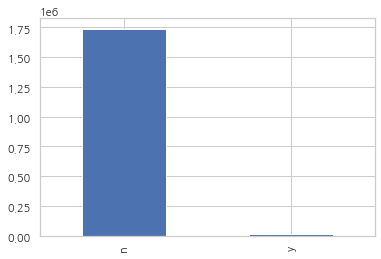

In [ ]:
df_kor['해지여부'].value_counts().plot(kind='bar')
plt.show()

### 해지율 피벗테이블 생성

In [ ]:
# 범주형 변수만 있는 데이터 생성: df_cat
# 주의: 종속변수도 빼먹지 말고 넣어주기
df_cat = df_kor.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,17,18,19,21,22,23,25,26,28,32,33,34]]   
df_cat.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널이용증가여부,선호채널,아이들나라이용여부,넷플릭시이용여부,유튜브이용여부,해지여부
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,Y,N,N,N,수신,수신,감소,기타,N,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,N,N,N,N,전체거부,수신,비슷,KBS1,N,N,N,n


In [ ]:
# value count를 위한 임시 컬럼 추가
df_cat['Count'] = 1
df_cat.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널이용증가여부,선호채널,아이들나라이용여부,넷플릭시이용여부,유튜브이용여부,해지여부,Count
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,Y,N,N,N,수신,수신,감소,기타,N,N,N,n,1
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,N,N,N,N,전체거부,수신,비슷,KBS1,N,N,N,n,1


In [ ]:
# # 피벗 테이블 생성
# ATT_SVC_USE_DAYS_GRP = df_cat.pivot_table(index=df_cat['SVC_USE_DAYS_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_MEDIA_NM_GRP = df_cat.pivot_table(index=df_cat['MEDIA_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_PROD_NM_GRP = df_cat.pivot_table(index=df_cat['PROD_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_PROD_OLD_YN = df_cat.pivot_table(index=df_cat['PROD_OLD_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_AGMT_KIND_NM = df_cat.pivot_table(index=df_cat['AGMT_KIND_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_STB_RES_1M_YN = df_cat.pivot_table(index=df_cat['STB_RES_1M_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_SVOD_SCRB_CNT_GRP = df_cat.pivot_table(index=df_cat['SVOD_SCRB_CNT_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_PAID_CHNL_SCRB_CNT_GRP = df_cat.pivot_table(index=df_cat['PAID_CHNL_SCRB_CNT_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_SCRB_PATH_NM_GRP = df_cat.pivot_table(index=df_cat['SCRB_PATH_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_AGMT_END_SEG = df_cat.pivot_table(index=df_cat['AGMT_END_SEG'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_AGMT_END_YMD = df_cat.pivot_table(index=df_cat['AGMT_END_YMD'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_BUNDLE_YN = df_cat.pivot_table(index=df_cat['BUNDLE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_DIGITAL_GIGA_YN = df_cat.pivot_table(index=df_cat['DIGITAL_GIGA_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_DIGITAL_ALOG_YN = df_cat.pivot_table(index=df_cat['DIGITAL_ALOG_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_VOC_TOTAL_MONTH1_YN = df_cat.pivot_table(index=df_cat['VOC_TOTAL_MONTH1_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_EMAIL_RECV_CLS_NM = df_cat.pivot_table(index=df_cat['EMAIL_RECV_CLS_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_SMS_SEND_CLS_NM = df_cat.pivot_table(index=df_cat['SMS_SEND_CLS_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_CH_TMS_1_2_INCREASE_YN = df_cat.pivot_table(index=df_cat['CH_TMS_1_2_INCREASE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_CH_FAV_RANK1 = df_cat.pivot_table(index=df_cat['CH_FAV_RANK1'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_KIDS_USE_YN_MONTH1 = df_cat.pivot_table(index=df_cat['KIDS_USE_YN_MONTH1'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_NFX_USE_YN = df_cat.pivot_table(index=df_cat['NFX_USE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_YTB_USE_YN = df_cat.pivot_table(index=df_cat['YTB_USE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')

In [ ]:
# # 해지율 컬럼 추가 & 높은 순서대로 정렬
# att_list = [
# ATT_SVC_USE_DAYS_GRP,
# ATT_MEDIA_NM_GRP,
# ATT_PROD_NM_GRP,
# ATT_PROD_OLD_YN,
# ATT_AGMT_KIND_NM,
# ATT_STB_RES_1M_YN,
# ATT_SVOD_SCRB_CNT_GRP,
# ATT_PAID_CHNL_SCRB_CNT_GRP,
# ATT_SCRB_PATH_NM_GRP,
# ATT_AGMT_END_SEG,
# ATT_AGMT_END_YMD,
# ATT_BUNDLE_YN,
# ATT_DIGITAL_GIGA_YN,
# ATT_DIGITAL_ALOG_YN,
# ATT_VOC_TOTAL_MONTH1_YN,
# ATT_EMAIL_RECV_CLS_NM,
# ATT_SMS_SEND_CLS_NM,
# ATT_CH_TMS_1_2_INCREASE_YN,
# ATT_CH_FAV_RANK1,
# ATT_KIDS_USE_YN_MONTH1,
# ATT_NFX_USE_YN,
# ATT_YTB_USE_YN
# ]

# for i in att_list:
#     i['churning_rate(%)'] = round((i[('Count', 'y')] / (i[('Count', 'n')] + i[('Count', 'y')])) * 100, 2)
#     i.sort_values(by=['churning_rate(%)'], ascending=False, inplace=True)
#     print(i, '\n')

In [ ]:
# df_num = df.columns.difference([
# 'SVC_USE_DAYS_GRP',
# 'MEDIA_NM_GRP',
# 'PROD_NM_GRP',
# 'PROD_OLD_YN',
# 'AGMT_KIND_NM',
# 'STB_RES_1M_YN',
# 'SVOD_SCRB_CNT_GRP',
# 'PAID_CHNL_SCRB_CNT_GRP',
# 'SCRB_PATH_NM_GRP',
# 'AGMT_END_SEG',
# 'AGMT_END_YMD',
# 'BUNDLE_YN',
# 'DIGITAL_GIGA_YN',
# 'DIGITAL_ALOG_YN',
# 'VOC_TOTAL_MONTH1_YN',
# 'EMAIL_RECV_CLS_NM',
# 'SMS_SEND_CLS_NM',
# 'CH_TMS_1_2_INCREASE_YN',
# 'CH_FAV_RANK1',
# 'KIDS_USE_YN_MONTH1',
# 'NFX_USE_YN',
# 'YTB_USE_YN'
# ])

In [ ]:
# df_num.dtype

## 변수 선택 및 삭제

### 변수삭제

In [ ]:
### 삭제변수
# ['1달이용금액',
# '3달이용금액',
# '넷플릭시이용여부',
# '유튜브이용여부',
# 'TV가입',
# 'TV인터넷가입건수',
# '디지털기가가입여부',
# '디지털아날로그여부',
# '아이들나라이용여부',
# '구상품여부']

In [ ]:
# 1차 변수 삭제
df_kor = df_kor.drop(['1달이용금액',
'3달이용금액',
'넷플릭시이용여부',
'유튜브이용여부',
], axis=1)

In [ ]:
# 1차 변수 삭제
# df_kor = df_kor.drop(['1달이용금액',
# '3달이용금액',
# '넷플릭시이용여부',
# '유튜브이용여부',
# 'TV가입',
# 'TV인터넷가입건수',
# '디지털기가가입여부',
# '디지털아날로그여부',
# '아이들나라이용여부',
# '구상품여부'], axis=1)

In [ ]:
df_kor.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,TV가입,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,TV인터넷가입건수,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널시간대별평균1달시간,채널이용증가여부,선호채널,아이들나라PV,아이들나라이용여부,아이들나라VOD이용여부,해지여부,총이용일수_Category,채널시간대별평균1달시간_Category
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2건,0건,2건,0건,0건,N,N,N,2건,N,수신,수신,13.77000,비슷,기타,0건,N,0건,n,2453~3041,8~
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,3건 이상,0건,3건 이상,0건,0건,N,N,N,4건 이상,N,수신,수신,5.80000,비슷,기타,0건,N,0건,n,2453~3041,5~7
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,1건,0건,1건,0건,0건,N,N,N,1건,N,수신,수신,0.00000,비슷,기타,0건,N,0건,n,2453~3041,0~2
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3건 이상,0건,3건 이상,1건,0건,Y,N,N,4건 이상,N,수신,수신,6.43000,감소,기타,0건,N,0건,n,3042~,5~7
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,1건,0건,1건,0건,0건,N,N,N,1건,N,전체거부,수신,5.21000,비슷,KBS1,0건,N,0건,n,3042~,5~7


In [ ]:
df_kor.columns

Index(['서비스이용일그룹', '미디어그룹명', '상품명글룹', '구상품여부', '약정종류', '셑탑1개월유지여부', 'SVOD가입건수',
       '유료채널가입그룹', '가입경로명', '약정종료', '약정종료년월', 'TV가입', '아날로그가입', '디지털가입',
       '총인터넷가입', '기가인터넷가입건수', '번들상품가입여부', '디지털기가가입여부', '디지털아날로그여부',
       'TV인터넷가입건수', 'VOC1개월발생여부', '이메일수신분류명', 'SMS수신불류명', '채널시간대별평균1달시간',
       '채널이용증가여부', '선호채널', '아이들나라PV', '아이들나라이용여부', '아이들나라VOD이용여부', '해지여부',
       '총이용일수_Category', '채널시간대별평균1달시간_Category'],
      dtype='object')

In [ ]:
# 범주형 변수와 연속형 변수 구분한 리스트 생성
num = df_kor.select_dtypes('number').columns.to_list()
cat = df_kor.select_dtypes('object').columns.to_list()

In [ ]:
num

['채널시간대별평균1달시간']

In [ ]:
cat

['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '구상품여부',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 '약정종료년월',
 'TV가입',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '번들상품가입여부',
 '디지털기가가입여부',
 '디지털아날로그여부',
 'TV인터넷가입건수',
 'VOC1개월발생여부',
 '이메일수신분류명',
 'SMS수신불류명',
 '채널이용증가여부',
 '선호채널',
 '아이들나라PV',
 '아이들나라이용여부',
 '아이들나라VOD이용여부',
 '해지여부']

In [ ]:
len(num) + len(cat)

30

### 변수 추가 삭제1

In [ ]:
# # 마케팅 동의에 따른 해지율 차이 극소, 주고객 연령대 높아 마케팅 동의의 변별력 낮음
# df_kor = df_kor.drop(['이메일수신분류명','SMS수신불류명'], axis=1)

In [ ]:
# df_kor.head()

### 변수 추가 삭제2

In [ ]:
# # KBS, OCN 등 해지율 높으나 지상파가 해지율이 높다던지하는 채널간 해지율의 공통점 보이지 않음
# df_kor = df_kor.drop(['선호채널'], axis=1)

In [ ]:
# df_kor.head()

### 변수 추가 삭제3

In [ ]:
# # 아날로그가입 0이 97프로 이상으로 유의미한 변수라고 생각되지 않음
# df_kor = df_kor.drop(['아날로그가입'], axis=1)

In [ ]:
# df_kor.columns

In [ ]:
# # 범주형 변수와 연속형 변수 구분한 리스트 생성
# num = df_kor.select_dtypes('number').columns.to_list()
# cat = df_kor.select_dtypes('object').columns.to_list()

### 변수 추가 삭제4

In [ ]:
# 약정종료 년월 자체의 의미가 있을지 의문
df_kor = df_kor.drop(['약정종료년월'], axis=1)

In [ ]:
# 채널시간대별평균1달시간 범주화로 인해 삭제
df_kor = df_kor.drop(['채널시간대별평균1달시간'], axis=1)

In [ ]:
df_kor.columns

Index(['서비스이용일그룹', '미디어그룹명', '상품명글룹', '구상품여부', '약정종류', '셑탑1개월유지여부', 'SVOD가입건수',
       '유료채널가입그룹', '가입경로명', '약정종료', 'TV가입', '아날로그가입', '디지털가입', '총인터넷가입',
       '기가인터넷가입건수', '번들상품가입여부', '디지털기가가입여부', '디지털아날로그여부', 'TV인터넷가입건수',
       'VOC1개월발생여부', '이메일수신분류명', 'SMS수신불류명', '채널이용증가여부', '선호채널', '아이들나라PV',
       '아이들나라이용여부', '아이들나라VOD이용여부', '해지여부', '총이용일수_Category',
       '채널시간대별평균1달시간_Category'],
      dtype='object')

In [ ]:
df_kor.nunique()

서비스이용일그룹                  5
미디어그룹명                    2
상품명글룹                     6
구상품여부                     2
약정종류                      6
셑탑1개월유지여부                 2
SVOD가입건수                  4
유료채널가입그룹                  4
가입경로명                    10
약정종료                     10
TV가입                      3
아날로그가입                    2
디지털가입                     3
총인터넷가입                    3
기가인터넷가입건수                 2
번들상품가입여부                  2
디지털기가가입여부                 2
디지털아날로그여부                 2
TV인터넷가입건수                 4
VOC1개월발생여부                2
이메일수신분류명                  4
SMS수신불류명                  4
채널이용증가여부                  4
선호채널                     15
아이들나라PV                   2
아이들나라이용여부                 2
아이들나라VOD이용여부              2
해지여부                      2
총이용일수_Category            4
채널시간대별평균1달시간_Category     4
dtype: int64

In [ ]:
df_raw = df_kor.copy()

In [ ]:
# df_raw csv 변환
df_raw.to_csv('/home/ljy1115/project/df_raw.csv')

# df_raw로 다시 시작

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings    # 경고문구 지우기

In [ ]:
# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score    # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트 라이브러리
import warnings    # 경고문구 지우기

In [ ]:
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
import os

path = os.getcwd()
print(path)

/home/ljy1115


In [ ]:
df_raw  = pd.read_csv('/home/ljy1115/project/df_raw.csv',sep=',')

In [ ]:
# 범주형 변수와 연속형 변수 구분한 리스트 생성
num = df_raw.select_dtypes('number').columns.to_list()
cat = df_raw.select_dtypes('object').columns.to_list()

In [ ]:
cat

['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '구상품여부',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 'TV가입',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '번들상품가입여부',
 '디지털기가가입여부',
 '디지털아날로그여부',
 'TV인터넷가입건수',
 'VOC1개월발생여부',
 '이메일수신분류명',
 'SMS수신불류명',
 '채널이용증가여부',
 '선호채널',
 '아이들나라PV',
 '아이들나라이용여부',
 '아이들나라VOD이용여부',
 '해지여부',
 '총이용일수_Category',
 '채널시간대별평균1달시간_Category']

### 선택된 변수 one hot encoding 진행(get_dummies)

In [ ]:
# drop_first = True
categorical = ['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '구상품여부',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 'TV가입',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '번들상품가입여부',
 '디지털기가가입여부',
 '디지털아날로그여부',
 'TV인터넷가입건수',
 'VOC1개월발생여부',
 '이메일수신분류명',
 'SMS수신불류명',
 '채널이용증가여부',
 '선호채널',
 '아이들나라PV',
 '아이들나라이용여부',
 '아이들나라VOD이용여부',
 '해지여부',
 '총이용일수_Category',
 '채널시간대별평균1달시간_Category']
df_raw = pd.get_dummies(df_raw, columns = categorical, prefix = ['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '구상품여부',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 'TV가입',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '번들상품가입여부',
 '디지털기가가입여부',
 '디지털아날로그여부',
 'TV인터넷가입건수',
 'VOC1개월발생여부',
 '이메일수신분류명',
 'SMS수신불류명',
 '채널이용증가여부',
 '선호채널',
 '아이들나라PV',
 '아이들나라이용여부',
 '아이들나라VOD이용여부',
 '해지여부',
 '총이용일수_Category',
 '채널시간대별평균1달시간_Category'], drop_first = True)

In [ ]:
# # drop_first = False
# categorical = ['서비스이용일그룹',
#  '미디어그룹명',
#  '상품명글룹',
#  '구상품여부',
#  '약정종류',
#  '셑탑1개월유지여부',
#  'SVOD가입건수',
#  '유료채널가입그룹',
#  '가입경로명',
#  '약정종료',
#  'TV가입',
#  '아날로그가입',
#  '디지털가입',
#  '총인터넷가입',
#  '기가인터넷가입건수',
#  '번들상품가입여부',
#  '디지털기가가입여부',
#  '디지털아날로그여부',
#  'TV인터넷가입건수',
#  'VOC1개월발생여부',
#  '이메일수신분류명',
#  'SMS수신불류명',
#  '채널이용증가여부',
#  '선호채널',
#  '아이들나라PV',
#  '아이들나라이용여부',
#  '아이들나라VOD이용여부',
#  '해지여부',
#  '총이용일수_Category',
#  '채널시간대별평균1달시간_Category']
# df_raw = pd.get_dummies(df_raw, columns = categorical, prefix = ['서비스이용일그룹',
#  '미디어그룹명',
#  '상품명글룹',
#  '구상품여부',
#  '약정종류',
#  '셑탑1개월유지여부',
#  'SVOD가입건수',
#  '유료채널가입그룹',
#  '가입경로명',
#  '약정종료',
#  'TV가입',
#  '아날로그가입',
#  '디지털가입',
#  '총인터넷가입',
#  '기가인터넷가입건수',
#  '번들상품가입여부',
#  '디지털기가가입여부',
#  '디지털아날로그여부',
#  'TV인터넷가입건수',
#  'VOC1개월발생여부',
#  '이메일수신분류명',
#  'SMS수신불류명',
#  '채널이용증가여부',
#  '선호채널',
#  '아이들나라PV',
#  '아이들나라이용여부',
#  '아이들나라VOD이용여부',
#  '해지여부',
#  '총이용일수_Category',
#  '채널시간대별평균1달시간_Category'], drop_first = False)

In [ ]:
cat

['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '구상품여부',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 'TV가입',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '번들상품가입여부',
 '디지털기가가입여부',
 '디지털아날로그여부',
 'TV인터넷가입건수',
 'VOC1개월발생여부',
 '이메일수신분류명',
 'SMS수신불류명',
 '채널이용증가여부',
 '선호채널',
 '아이들나라PV',
 '아이들나라이용여부',
 '아이들나라VOD이용여부',
 '해지여부',
 '총이용일수_Category',
 '채널시간대별평균1달시간_Category']

In [ ]:
num

['Unnamed: 0']

In [ ]:
df_raw.columns

Index(['Unnamed: 0', '서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상',
       '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직',
       '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '구상품여부_Y',
       '약정종류_약정갱신', '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정',
       '셑탑1개월유지여부_Y', 'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상',
       '유료채널가입그룹_1건', '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타',
       '가입경로명_렌탈제휴', '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음',
       '가입경로명_직영몰', '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월',
       '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월',
       '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월',
       '약정종료_약정 만료 후 9~12개월', 'TV가입_2건', 'TV가입_3건 이상', '아날로그가입_1건 이상',
       '디지털가입_2건', '디지털가입_3건 이상', '총인터넷가입_1건', '총인터넷가입_2건 이상',
       '기가인터넷가입건수_1건 이상', '번들상품가입여부_Y', '디지털기가가입여부_Y', '디지털아날로그여부_Y',
       'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건', 'TV인터넷가입건수_4건 이상', '

In [ ]:
df_raw = df_raw.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_raw.columns

Index(['서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만',
       '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직', '상품명글룹_세이버', '상품명글룹_스탠다드',
       '상품명글룹_이코노미', '상품명글룹_프리미엄', '구상품여부_Y', '약정종류_약정갱신', '약정종류_약정승계',
       '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y', 'SVOD가입건수_1건',
       'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건', '유료채널가입그룹_2건',
       '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담',
       '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로',
       '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월',
       '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상',
       '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월',
       'TV가입_2건', 'TV가입_3건 이상', '아날로그가입_1건 이상', '디지털가입_2건', '디지털가입_3건 이상',
       '총인터넷가입_1건', '총인터넷가입_2건 이상', '기가인터넷가입건수_1건 이상', '번들상품가입여부_Y',
       '디지털기가가입여부_Y', '디지털아날로그여부_Y', 'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건',
       'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y',

In [ ]:
df_raw.astype('float')

,서비스이용일그룹_24개월~36개월미만,서비스이용일그룹_36개월 이상,서비스이용일그룹_6개월~12개월미만,서비스이용일그룹_6개월미만,미디어그룹명_UHD,상품명글룹_베이직,상품명글룹_세이버,상품명글룹_스탠다드,상품명글룹_이코노미,상품명글룹_프리미엄,구상품여부_Y,약정종류_약정갱신,약정종류_약정승계,약정종류_약정연장,약정종류_약정축소,약정종류_재약정,셑탑1개월유지여부_Y,SVOD가입건수_1건,SVOD가입건수_2건,SVOD가입건수_3건 이상,유료채널가입그룹_1건,유료채널가입그룹_2건,유료채널가입그룹_3건 이상,가입경로명_O/B,가입경로명_기타,가입경로명_렌탈제휴,가입경로명_일반상담,가입경로명_임직원,가입경로명_전략채널,가입경로명_정보없음,가입경로명_직영몰,가입경로명_현장경로,약정종료_약정 만료 전 12개월이상,약정종료_약정 만료 전 3~6개월,약정종료_약정 만료 전 6~9개월,약정종료_약정 만료 전 9~12개월,약정종료_약정 만료 후 0~3개월,약정종료_약정 만료 후 12개월이상,약정종료_약정 만료 후 3~6개월,약정종료_약정 만료 후 6~9개월,약정종료_약정 만료 후 9~12개월,TV가입_2건,TV가입_3건 이상,아날로그가입_1건 이상,디지털가입_2건,디지털가입_3건 이상,총인터넷가입_1건,총인터넷가입_2건 이상,기가인터넷가입건수_1건 이상,번들상품가입여부_Y,디지털기가가입여부_Y,디지털아날로그여부_Y,TV인터넷가입건수_2건,TV인터넷가입건수_3건,TV인터넷가입건수_4건 이상,VOC1개월발생여부_Y,이메일수신분류명_미응답,이메일수신분류명_수신,이메일수신분류명_전체거부,SMS수신불류명_미응답,SMS수신불류명_수신,SMS수신불류명_전체거부,채널이용증가여부_비슷,채널이용증가여부_시청없음,채널이용증가여부_증가,선호채널_JTBC,선호채널_KBS1,선호채널_KBS2,선호채널_MBC,선호채널_MBN,선호채널_OCN,선호채널_SBS,선호채널_TV조선,선호채널_TV조선2,선호채널_YTN,선호채널_tvN,선호채널_기타,선호채널_연합뉴스TV,선호채널_헬로방송,아이들나라PV_1건 이상,아이들나라이용여부_Y,아이들나라VOD이용여부_1건 이상,해지여부_y,총이용일수_Category_1709~2452,총이용일수_Category_2453~3041,총이용일수_Category_3042~,채널시간대별평균1달시간_Category_3~4,채널시간대별평균1달시간_Category_5~7,채널시간대별평균1달시간_Category_8~
0,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
2,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000

In [ ]:
# df_raw = df_raw.drop(['해지여부_n'], axis=1)

In [ ]:
# train_X csv 변환
df_raw.to_csv('/home/ljy1115/project/df_raw.csv')

### train / test split

In [ ]:
feature_columns = list(df_raw.columns.difference(['해지여부_y']))
X = df_raw[feature_columns]    # 변인변수들의 데이터 Set
y = df_raw['해지여부_y']    # 종속변수 데이터를

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.01, random_state = 55)    # Test Set을 0.01의 비율로 생성

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1732400, 88) (17499, 88) (1732400,) (17499,)


In [ ]:
print(df_raw.columns.tolist())

['서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직', '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '구상품여부_Y', '약정종류_약정갱신', '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y', 'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건', '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월', 'TV가입_2건', 'TV가입_3건 이상', '아날로그가입_1건 이상', '디지털가입_2건', '디지털가입_3건 이상', '총인터넷가입_1건', '총인터넷가입_2건 이상', '기가인터넷가입건수_1건 이상', '번들상품가입여부_Y', '디지털기가가입여부_Y', '디지털아날로그여부_Y', 'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건', 'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y', '이메일수신분류명_미응답', '이메일수신분류명_수신', '이메일수신분류명_전체거부', 'SMS수신불류명_미응답', 'SMS수신불류명_수신', 'SMS수신불류명_전체거부', 

In [ ]:
df_raw.head()

,서비스이용일그룹_24개월~36개월미만,서비스이용일그룹_36개월 이상,서비스이용일그룹_6개월~12개월미만,서비스이용일그룹_6개월미만,미디어그룹명_UHD,상품명글룹_베이직,상품명글룹_세이버,상품명글룹_스탠다드,상품명글룹_이코노미,상품명글룹_프리미엄,구상품여부_Y,약정종류_약정갱신,약정종류_약정승계,약정종류_약정연장,약정종류_약정축소,약정종류_재약정,셑탑1개월유지여부_Y,SVOD가입건수_1건,SVOD가입건수_2건,SVOD가입건수_3건 이상,유료채널가입그룹_1건,유료채널가입그룹_2건,유료채널가입그룹_3건 이상,가입경로명_O/B,가입경로명_기타,가입경로명_렌탈제휴,가입경로명_일반상담,가입경로명_임직원,가입경로명_전략채널,가입경로명_정보없음,가입경로명_직영몰,가입경로명_현장경로,약정종료_약정 만료 전 12개월이상,약정종료_약정 만료 전 3~6개월,약정종료_약정 만료 전 6~9개월,약정종료_약정 만료 전 9~12개월,약정종료_약정 만료 후 0~3개월,약정종료_약정 만료 후 12개월이상,약정종료_약정 만료 후 3~6개월,약정종료_약정 만료 후 6~9개월,약정종료_약정 만료 후 9~12개월,TV가입_2건,TV가입_3건 이상,아날로그가입_1건 이상,디지털가입_2건,디지털가입_3건 이상,총인터넷가입_1건,총인터넷가입_2건 이상,기가인터넷가입건수_1건 이상,번들상품가입여부_Y,디지털기가가입여부_Y,디지털아날로그여부_Y,TV인터넷가입건수_2건,TV인터넷가입건수_3건,TV인터넷가입건수_4건 이상,VOC1개월발생여부_Y,이메일수신분류명_미응답,이메일수신분류명_수신,이메일수신분류명_전체거부,SMS수신불류명_미응답,SMS수신불류명_수신,SMS수신불류명_전체거부,채널이용증가여부_비슷,채널이용증가여부_시청없음,채널이용증가여부_증가,선호채널_JTBC,선호채널_KBS1,선호채널_KBS2,선호채널_MBC,선호채널_MBN,선호채널_OCN,선호채널_SBS,선호채널_TV조선,선호채널_TV조선2,선호채널_YTN,선호채널_tvN,선호채널_기타,선호채널_연합뉴스TV,선호채널_헬로방송,아이들나라PV_1건 이상,아이들나라이용여부_Y,아이들나라VOD이용여부_1건 이상,해지여부_y,총이용일수_Category_1709~2452,총이용일수_Category_2453~3041,총이용일수_Category_3042~,채널시간대별평균1달시간_Category_3~4,채널시간대별평균1달시간_Category_5~7,채널시간대별평균1달시간_Category_8~
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
# 연속형 변수 리스트(standard scaling 적용) 및 범주형 변수 리스트(minmax scaling 적용)

# standard_list = ['TOTAL_USED_DAYS',
#  'ANALOG_SCRB',
#  'DIGITAL_SCRB',
#  'TOTAL_INTERNET_SCRB',
#  'GIGA_INTERNET_SCRB',
#  'CH_HH_AVG_MONTH1',
#  'KIDS_USE_PV_MONTH1',
#  'KIDS_VOD_CNT_MONTH1']

## '해지여부' 컬럼 지워야 함
minmax_list = ['서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직', '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '구상품여부_Y', '약정종류_약정갱신', '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y', 'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건', '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월', 'TV가입_2건', 'TV가입_3건 이상', '아날로그가입_1건 이상', '디지털가입_2건', '디지털가입_3건 이상', '총인터넷가입_1건', '총인터넷가입_2건 이상', '기가인터넷가입건수_1건 이상', '번들상품가입여부_Y', '디지털기가가입여부_Y', '디지털아날로그여부_Y', 'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건', 'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y', '이메일수신분류명_미응답', '이메일수신분류명_수신', '이메일수신분류명_전체거부', 'SMS수신불류명_미응답', 'SMS수신불류명_수신', 'SMS수신불류명_전체거부', '채널이용증가여부_비슷', '채널이용증가여부_시청없음', '채널이용증가여부_증가', '선호채널_JTBC', '선호채널_KBS1', '선호채널_KBS2', '선호채널_MBC', '선호채널_MBN', '선호채널_OCN', '선호채널_SBS', '선호채널_TV조선', '선호채널_TV조선2', '선호채널_YTN', '선호채널_tvN', '선호채널_기타', '선호채널_연합뉴스TV', '선호채널_헬로방송', '아이들나라PV_1건 이상', '아이들나라이용여부_Y', '아이들나라VOD이용여부_1건 이상', '총이용일수_Category_1709~2452', '총이용일수_Category_2453~3041', '총이용일수_Category_3042~', '채널시간대별평균1달시간_Category_3~4', '채널시간대별평균1달시간_Category_5~7', '채널시간대별평균1달시간_Category_8~']

In [ ]:
# 스케일링 적용 변수별 데이터 추출

# train_X1 = train_X[standard_list]
# test_X1 = test_X[standard_list]
train_X2 = train_X[minmax_list]
test_X2 = test_X[minmax_list]

In [ ]:
# 데이터 스케일링 진행

# scaler1 = StandardScaler()
# train_X1 = scaler1.fit_transform(train_X1)
# test_X1 = scaler1.transform(test_X1)

scaler2 = MinMaxScaler()
train_X2 = scaler2.fit_transform(train_X2)
test_X2 = scaler2.fit_transform(test_X2)

In [ ]:
# 스케일링 값으로 대체

# train_X[standard_list] = train_X1
# test_X[standard_list] = test_X1
train_X[minmax_list] = train_X2
test_X[minmax_list] = test_X2

### train_X, train_y csv 저장

In [ ]:
# train_X csv 변환
train_X.to_csv('/home/ljy1115/project/train_X.csv')

In [ ]:
# train_y csv 변환
train_y.to_csv('/home/ljy1115/project/train_y.csv')

In [ ]:
# test_X csv 변환
test_X.to_csv('/home/ljy1115/project/test_X.csv')

In [ ]:
# test_y csv 변환
test_y.to_csv('/home/ljy1115/project/test_y.csv')

# train_X, train_y, test_X, test_y 에서 다시 시작

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings    # 경고문구 지우기

In [ ]:
# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score    # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트 라이브러리
import warnings    # 경고문구 지우기

In [ ]:
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
import os

path = os.getcwd()
print(path)

/home/ljy1115


In [ ]:
train_X  = pd.read_csv('/home/ljy1115/project/train_X.csv',sep=',')

In [ ]:
train_y  = pd.read_csv('/home/ljy1115/project/train_y.csv',sep=',')

In [ ]:
test_X  = pd.read_csv('/home/ljy1115/project/test_X.csv',sep=',')

In [ ]:
test_y  = pd.read_csv('/home/ljy1115/project/test_y.csv',sep=',')

#### Unnamed 탈락

In [ ]:
train_X = train_X.drop(['Unnamed: 0'], axis=1)
train_y = train_y.drop(['Unnamed: 0'], axis=1)
test_X = test_X.drop(['Unnamed: 0'], axis=1)
test_y = test_y.drop(['Unnamed: 0'], axis=1)

In [ ]:
# 모든 데이터 값을 float32 type으로 변경

train_X = train_X.astype(np.float32)
test_X = test_X.astype(np.float32)
train_y = train_y.astype(np.float32)
test_y = test_y.astype(np.float32)

In [ ]:
# 머신러닝 데이터 처리 임포트
from sklearn.neighbors import KNeighborsClassifier    # 결측값을 위한 KNN 분류기
from sklearn.preprocessing import MinMaxScaler, StandardScaler    # 데이터 스케일링 라이브러리
from sklearn.decomposition import PCA, KernelPCA    # 차원 축소 라이브러리
from sklearn.model_selection import train_test_split, KFold    # Train/Test Set 구분 라이브러리
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN    # 오버샘플링 라이브러리
from imblearn.combine import SMOTEENN, SMOTETomek    # 복합샘플링 라이브러리

# 머신러닝 모델링 임포트
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.linear_model import LogisticRegression, Lasso, Ridge    # 로지스틱회귀, 라쏘, 릿지 라이브러리
from sklearn.tree import DecisionTreeClassifier    # 의사결정나무 라이브러리
from sklearn.ensemble import RandomForestClassifier    # Random Forest 라이브러리
from sklearn.svm import SVC    # SVC 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from lightgbm import LGBMClassifier    # LGBM 라이브러리
from sklearn.model_selection import GridSearchCV    # GridSearch 라이브러리

## 샘플링

### SMOTE 샘플링

In [ ]:
train_X_os, train_y_os = SMOTE(random_state = 55).fit_resample(train_X, train_y)

In [ ]:
## smote샘플링 데이터 저장
# train_X_os csv 변환
train_X_os.to_csv('/home/ljy1115/project/train_X_os.csv')
# train_y_os csv 변환
train_y_os.to_csv('/home/ljy1115/project/train_y_os.csv')

In [ ]:
import pandas as pd

In [ ]:
## smote 샘플링 데이터 불러오기
train_X_os = pd.read_csv('/home/ljy1115/project/train_X_os.csv',sep=',')

In [ ]:
## smote 샘플링 데이터 불러오기
train_X_os = pd.read_csv('/home/ljy1115/project/train_X_os.csv',sep=',')

### 랜덤오버샘플링

In [ ]:
# oversample = RandomOverSampler(sampling_strategy='minority') # sampling_strategy=0.4 -> 소수집단데이터수/다수집단데이터수 = 0.4
# train_X_os, train_y_os = oversample.fit_resample(train_X, train_y)

### 샘플링(랜덤언더샘플링)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# 랜덤언더샘플링 기법을 이용한 데이터 샘플링 진행
train_X_us, train_y_us = RandomUnderSampler(random_state = 55).fit_resample(train_X, train_y)

In [ ]:
train_X_us.to_csv('/home/ljy1115/project/train_X_us.csv')

In [ ]:
train_y_us.to_csv('/home/ljy1115/project/train_y_us.csv')

In [ ]:
# train_X_us = train_X
# train_y_us = train_y

In [ ]:
# 모델 정확도 확인 함수 정의

def print_score(true, pred, train = True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

### 로지스틱 회귀분석

In [ ]:
train_X_us.columns

Index(['SMS수신불류명_미응답', 'SMS수신불류명_수신', 'SMS수신불류명_전체거부', 'SVOD가입건수_1건',
       'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', 'TV가입_2건', 'TV가입_3건 이상',
       'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건', 'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y',
       '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담', '가입경로명_임직원',
       '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로', '구상품여부_Y',
       '기가인터넷가입건수_1건 이상', '디지털가입_2건', '디지털가입_3건 이상', '디지털기가가입여부_Y',
       '디지털아날로그여부_Y', '미디어그룹명_UHD', '번들상품가입여부_Y', '상품명글룹_베이직', '상품명글룹_세이버',
       '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '서비스이용일그룹_24개월~36개월미만',
       '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만',
       '선호채널_JTBC', '선호채널_KBS1', '선호채널_KBS2', '선호채널_MBC', '선호채널_MBN',
       '선호채널_OCN', '선호채널_SBS', '선호채널_TV조선', '선호채널_TV조선2', '선호채널_YTN',
       '선호채널_tvN', '선호채널_기타', '선호채널_연합뉴스TV', '선호채널_헬로방송', '셑탑1개월유지여부_Y',
       '아날로그가입_1건 이상', '아이들나라PV_1건 이상', '아이들나라VOD이용여부_1건 이상', '아이들나라이용여부_Y',
       '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개

In [ ]:
selected = ['SMS수신불류명_미응답', 'SMS수신불류명_수신', 'SMS수신불류명_전체거부', 'SVOD가입건수_1건',
       'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', 'TV가입_2건', 'TV가입_3건 이상',
       'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건', 'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y',
       '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담', '가입경로명_임직원',
       '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로', '구상품여부_Y',
       '기가인터넷가입건수_1건 이상', '디지털가입_2건', '디지털가입_3건 이상', '디지털기가가입여부_Y',
       '디지털아날로그여부_Y', '미디어그룹명_UHD', '번들상품가입여부_Y', '상품명글룹_베이직', '상품명글룹_세이버',
       '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '서비스이용일그룹_24개월~36개월미만',
       '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만',
       '선호채널_JTBC', '선호채널_KBS1', '선호채널_KBS2', '선호채널_MBC', '선호채널_MBN',
       '선호채널_OCN', '선호채널_SBS', '선호채널_TV조선', '선호채널_TV조선2', '선호채널_YTN',
       '선호채널_tvN', '선호채널_기타', '선호채널_연합뉴스TV', '선호채널_헬로방송', '셑탑1개월유지여부_Y',
       '아날로그가입_1건 이상', '아이들나라PV_1건 이상', '아이들나라VOD이용여부_1건 이상', '아이들나라이용여부_Y',
       '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월',
       '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상',
       '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월',
       '약정종류_약정갱신', '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정',
       '유료채널가입그룹_1건', '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '이메일수신분류명_미응답',
       '이메일수신분류명_수신', '이메일수신분류명_전체거부', '채널시간대별평균1달시간_Category_3~4',
       '채널시간대별평균1달시간_Category_5~7', '채널시간대별평균1달시간_Category_8~', '채널이용증가여부_비슷',
       '채널이용증가여부_시청없음', '채널이용증가여부_증가', '총이용일수_Category_1709~2452',
       '총이용일수_Category_2453~3041', '총이용일수_Category_3042~', '총인터넷가입_1건',
       '총인터넷가입_2건 이상']
train_X_us1 = train_X_us[selected]
test_X1 = test_X[selected]

In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf = LogisticRegression() 

# 모델 학습 진행
lr_clf.fit(train_X_us1, train_y_us)

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 모델 평가지표 확인(V)

In [ ]:
# 모델 정확도 확인
train_y_pred = lr_clf.predict(train_X_us1)
test_y_pred = lr_clf.predict(test_X1)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

Train Result:
Accuracy Score: 65.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision    0.65222    0.66670   0.65913     0.65946       0.65946
recall       0.68184    0.63642   0.65913     0.65913       0.65913
f1-score     0.66670    0.65121   0.65913     0.65896       0.65896
support   9423.00000 9423.00000   0.65913 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[6425 2998]
 [3426 5997]]

Test Result:
Accuracy Score: 68.54%
_______________________________________________
CLASSIFICATION REPORT:
                     0          1  accuracy    macro avg  weighted avg
precision      0.99649    0.01344   0.68542      0.50496       0.98996
recall         0.68573    0.63945   0.68542      0.66259       0.68542
f1-score       0.81241    0.02632   0.68542      0.41936       0.80718
support   347653.00000 2327.00000   0.68542 349980.00000  349980.

In [ ]:
test_y_prob = lr_clf.predict_proba(test_X1)
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['precision', 'recall'])

for thres in threshold_list :
  test_y_pred_prob = np.zeros(len(test_y_prob))

  for i in range(len(test_y_prob)) :
    if test_y_prob[i][1] > thres :
      test_y_pred_prob[i] = 1
  
  tn = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fp = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fn = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tp = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  precision = tp / (tp + fp)
  recall = tp / (tp + fn)

  df_thres.loc[thres, 'precision'] = precision
  df_thres.loc[thres, 'recall'] = recall

/tmp/ipykernel_2100520/2470864374.py:17: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


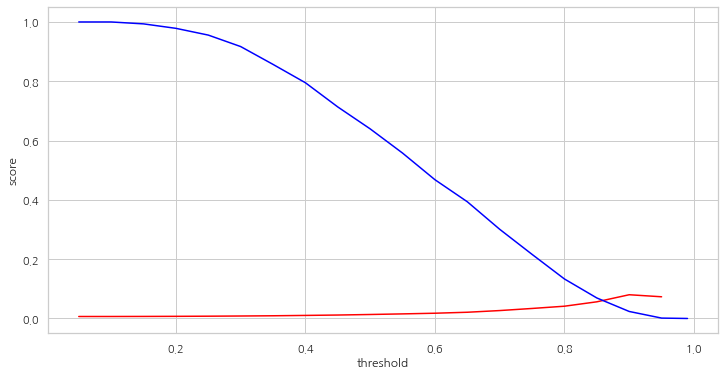

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize = (12, 6))

plt.plot(df_thres.index, df_thres['precision'], color = 'red')
plt.plot(df_thres.index, df_thres['recall'], color = 'blue')

plt.xlabel('threshold')
plt.ylabel('score')
plt.grid(True)
plt.show()

### 로지스틱 by SMOTE

In [ ]:
train_X.columns

Index(['SMS수신불류명_미응답', 'SMS수신불류명_수신', 'SMS수신불류명_전체거부', 'SVOD가입건수_1건',
       'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', 'TV가입_2건', 'TV가입_3건 이상',
       'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건', 'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y',
       '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담', '가입경로명_임직원',
       '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로', '구상품여부_Y',
       '기가인터넷가입건수_1건 이상', '디지털가입_2건', '디지털가입_3건 이상', '디지털기가가입여부_Y',
       '디지털아날로그여부_Y', '미디어그룹명_UHD', '번들상품가입여부_Y', '상품명글룹_베이직', '상품명글룹_세이버',
       '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '서비스이용일그룹_24개월~36개월미만',
       '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만',
       '선호채널_JTBC', '선호채널_KBS1', '선호채널_KBS2', '선호채널_MBC', '선호채널_MBN',
       '선호채널_OCN', '선호채널_SBS', '선호채널_TV조선', '선호채널_TV조선2', '선호채널_YTN',
       '선호채널_tvN', '선호채널_기타', '선호채널_연합뉴스TV', '선호채널_헬로방송', '셑탑1개월유지여부_Y',
       '아날로그가입_1건 이상', '아이들나라PV_1건 이상', '아이들나라VOD이용여부_1건 이상', '아이들나라이용여부_Y',
       '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개

In [ ]:
selected = ['SMS수신불류명_미응답', 'SMS수신불류명_수신', 'SMS수신불류명_전체거부', 'SVOD가입건수_1건',
       'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', 'TV가입_2건', 'TV가입_3건 이상',
       'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건', 'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y',
       '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담', '가입경로명_임직원',
       '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로', '구상품여부_Y',
       '기가인터넷가입건수_1건 이상', '디지털가입_2건', '디지털가입_3건 이상', '디지털기가가입여부_Y',
       '디지털아날로그여부_Y', '미디어그룹명_UHD', '번들상품가입여부_Y', '상품명글룹_베이직', '상품명글룹_세이버',
       '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '서비스이용일그룹_24개월~36개월미만',
       '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만',
       '선호채널_JTBC', '선호채널_KBS1', '선호채널_KBS2', '선호채널_MBC', '선호채널_MBN',
       '선호채널_OCN', '선호채널_SBS', '선호채널_TV조선', '선호채널_TV조선2', '선호채널_YTN',
       '선호채널_tvN', '선호채널_기타', '선호채널_연합뉴스TV', '선호채널_헬로방송', '셑탑1개월유지여부_Y',
       '아날로그가입_1건 이상', '아이들나라PV_1건 이상', '아이들나라VOD이용여부_1건 이상', '아이들나라이용여부_Y',
       '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월',
       '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상',
       '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월',
       '약정종류_약정갱신', '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정',
       '유료채널가입그룹_1건', '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '이메일수신분류명_미응답',
       '이메일수신분류명_수신', '이메일수신분류명_전체거부', '채널시간대별평균1달시간_Category_3~4',
       '채널시간대별평균1달시간_Category_5~7', '채널시간대별평균1달시간_Category_8~', '채널이용증가여부_비슷',
       '채널이용증가여부_시청없음', '채널이용증가여부_증가', '총이용일수_Category_1709~2452',
       '총이용일수_Category_2453~3041', '총이용일수_Category_3042~', '총인터넷가입_1건',
       '총인터넷가입_2건 이상']
train_X_os1 = train_X_os[selected]
test_X1 = test_X[selected]

In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf = LogisticRegression() 

# 모델 학습 진행
lr_clf.fit(train_X_os1, train_y_os)

In [ ]:
# 모델 정확도 확인
train_y_pred = lr_clf.predict(train_X_os1)
test_y_pred = lr_clf.predict(test_X1)

print_score(train_y_os, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

### AUC_ROC 커브

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:171: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)
/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :m

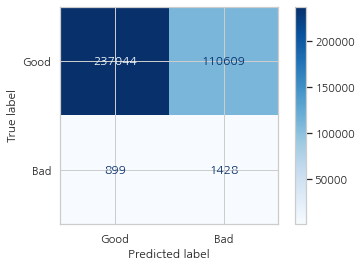

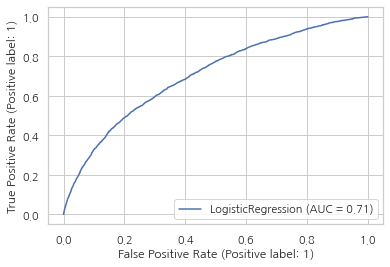

In [ ]:
# confusion matrix, AUC-ROC 커브 생성
# AUC 0.8이상이면 good

disp = plot_confusion_matrix(lr_clf, test_X1, test_y, cmap='Blues', values_format='d', display_labels=['Good', 'Bad'])
disp = plot_roc_curve(lr_clf, test_X1, test_y)

### 변수 선택법을 통한 로지스틱 회귀분석

#### VIF factor

In [ ]:
df_raw.columns

Index(['서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만',
       '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직', '상품명글룹_세이버', '상품명글룹_스탠다드',
       '상품명글룹_이코노미', '상품명글룹_프리미엄', '구상품여부_Y', '약정종류_약정갱신', '약정종류_약정승계',
       '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y', 'SVOD가입건수_1건',
       'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건', '유료채널가입그룹_2건',
       '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담',
       '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로',
       '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월',
       '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상',
       '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월',
       'TV가입_2건', 'TV가입_3건 이상', '아날로그가입_1건 이상', '디지털가입_2건', '디지털가입_3건 이상',
       '총인터넷가입_1건', '총인터넷가입_2건 이상', '기가인터넷가입건수_1건 이상', '번들상품가입여부_Y',
       '디지털기가가입여부_Y', '디지털아날로그여부_Y', 'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건',
       'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y',

In [ ]:
vif = pd.DataFrame()
lst = []

# 독립변수의 개수 만큼 반복
for i in range(df_raw.shape[1]):
    v = variance_inflation_factor(df_raw.values, i) # 컬럼을 정수로 지정한다.
    lst.append(v)
    
vif["VIF Factor"] = lst
vif["features"] = df_raw.columns
vif

#### lasso 선택법

In [ ]:
# 데이터 set 생성
check_list2 = ['서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만',
       '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직', '상품명글룹_세이버', '상품명글룹_스탠다드',
       '상품명글룹_이코노미', '상품명글룹_프리미엄', '구상품여부_Y', '약정종류_약정갱신', '약정종류_약정승계',
       '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y', 'SVOD가입건수_1건',
       'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건', '유료채널가입그룹_2건',
       '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담',
       '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로',
       '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월',
       '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상',
       '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월',
       'TV가입_2건', 'TV가입_3건 이상', '아날로그가입_1건 이상', '디지털가입_2건', '디지털가입_3건 이상',
       '총인터넷가입_1건', '총인터넷가입_2건 이상', '기가인터넷가입건수_1건 이상', '번들상품가입여부_Y',
       '디지털기가가입여부_Y', '디지털아날로그여부_Y', 'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건',
       'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y', '이메일수신분류명_미응답', '이메일수신분류명_수신',
       '이메일수신분류명_전체거부', 'SMS수신불류명_미응답', 'SMS수신불류명_수신', 'SMS수신불류명_전체거부',
       '채널이용증가여부_비슷', '채널이용증가여부_시청없음', '채널이용증가여부_증가', '선호채널_JTBC', '선호채널_KBS1',
       '선호채널_KBS2', '선호채널_MBC', '선호채널_MBN', '선호채널_OCN', '선호채널_SBS',
       '선호채널_TV조선', '선호채널_TV조선2', '선호채널_YTN', '선호채널_tvN', '선호채널_기타',
       '선호채널_연합뉴스TV', '선호채널_헬로방송', '아이들나라PV_1건 이상', '아이들나라이용여부_Y',
       '아이들나라VOD이용여부_1건 이상', '총이용일수_Category_1709~2452',
       '총이용일수_Category_2453~3041', '총이용일수_Category_3042~',
       '채널시간대별평균1달시간_Category_3~4', '채널시간대별평균1달시간_Category_5~7',
       '채널시간대별평균1달시간_Category_8~']

train_X_us2 = train_X_us[check_list2]
test_X2 = test_X[check_list2]

In [ ]:
lambda_list = [10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005]
thres_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
df_acc = pd.DataFrame(index = thres_list, columns = lambda_list)    # 정확도 값을 넣을 데이터프레임 생성

for value in lambda_list :
  # 모델 생성 및 학습
  lasso_model = Lasso(alpha = value)
  lasso_model.fit(train_X_us2, train_y_us)
    
  # Test 데이터 예측
  test_y_pred = lasso_model.predict(test_X2)

  for thres in thres_list :
    # threshold 값 기준으로 y값 0 / 1로 분류
    Y = test_y_pred.copy()
    Y[Y > thres] = 1
    Y[Y <= thres] = 0
    Y.astype(int)
    
    # Confusion matrix 생성 후 정확도 확인
    cfmat = confusion_matrix(test_y, Y)
    acc = (cfmat[0, 0] + cfmat[1, 1]) / np.sum(cfmat)

    df_acc.loc[thres, value] = acc

In [ ]:
df_acc    # threshold가 index, alpha 값이 column인 데이터프레임

,10.00000,5.00000,1.00000,0.50000,0.10000,0.05000,0.01000,0.00500
0.10000,0.00665,0.00665,0.00665,0.00665,0.00665,0.00665,0.00665,0.00665
0.20000,0.00665,0.00665,0.00665,0.00665,0.00665,0.00665,0.00665,0.01711
0.30000,0.00665,0.00665,0.00665,0.00665,0.00665,0.00665,0.07800,0.10542
0.40000,0.00665,0.00665,0.00665,0.00665,0.00665,0.00665,0.24127,0.37523
0.50000,0.99335,0.99335,0.99335,0.99335,0.99335,0.99335,0.60030,0.66629
0.60000,0.99335,0.99335,0.99335,0.99335,0.99335,0.99335,0.88381,0.87344
0.70000,0.99335,0.99335,0.99335,0.99335,0.99335,0.99335,0.98586,0.96405
0.80000,0.99335,0.99335,0.99335,0.99335,0.99335,0.99335,0.99145,0.98668
0.90000,0.99335,0.99335,0.99335,0.99335,0.99335,0.99335,0.99335,0.99313


In [ ]:
ls_0005 = Lasso(alpha = 0.005)
ls_0005.fit(train_X_us2, train_y_us)

# feature 확인
feature_selected = np.array(train_X_us2.columns)
print(feature_selected[np.where(ls_0005.coef_ != 0)])

['상품명글룹_프리미엄' '약정종류_약정승계' '약정종류_재약정' '셑탑1개월유지여부_Y' '가입경로명_현장경로'
 '약정종료_약정 만료 전 12개월이상' '약정종료_약정 만료 전 3~6개월' '약정종료_약정 만료 전 6~9개월'
 '약정종료_약정 만료 후 0~3개월' 'TV가입_2건' '총인터넷가입_1건' '번들상품가입여부_Y' 'VOC1개월발생여부_Y'
 '채널이용증가여부_증가' '선호채널_KBS1' '선호채널_기타' '채널시간대별평균1달시간_Category_3~4'
 '채널시간대별평균1달시간_Category_5~7' '채널시간대별평균1달시간_Category_8~']


#### 전진선택법

In [ ]:
feature_columns = list(train_X_us2.columns)
selected_features = []    # 유효 변수 저장 리스트 생성
selected_df = pd.DataFrame()    # 결과 저장 데이터프레임 생성
i = 1

while True :
  print('======================== step ' + str(i) + '========================')    # 스텝마다 시작을 알림
  for x in selected_features :    # 이미 유효한 변수로 선택된 변수들을 삭제
    if x in feature_columns :
      feature_columns.remove(x)
  
  df_aic = pd.DataFrame()    # 모델별 AIC값 저장 데이터프레임 생성

  for col in feature_columns :
    temp_list = selected_features.copy()
    temp_list.append(col)    # 유효 변수 + 각 변수 합한 리스트
    temp_X = train_X_us2[temp_list]    # 위에서 생성된 리스트 토대로 데이터프레임 추출

    temp_X = sm.add_constant(temp_X, has_constant = "add")    # 상수항 컬럼 더하기

    model = sm.Logit(train_y_us, temp_X)
    try :
      results = model.fit(method = 'bfgs')    # 로지스틱 회귀분석 실행
      df_aic = df_aic.append({'feature' : col, 'AIC' : results.aic} , ignore_index=True)    # 모델별 추가된 컬럼 및 AIC값 저장
    except Exception as e :
      pass
  
  # 반복문에서 생성된 데이터프레임에서 가장 작은 AIC 값을 가진 변수 및 AIC 값 추출
  selected_df = selected_df.append({'feature' : df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,0], 
                                    'AIC' : df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,1]} , ignore_index=True)
  selected_features.append(df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,0])

  i += 1

  print('Selected Features : ' + df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,0] + '  //  AIC : ' + str(df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,1]))

  if len(selected_df) >= 2 :
    if selected_df.iloc[-1, 1] > selected_df.iloc[-2, 1] :
      break

======================== step 1========================
Optimization terminated successfully.
         Current function value: 0.691422
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.693060
         Iterations: 6
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.692915
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.692935
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.693144
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.673013
        

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: 0.693146
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.693067
         Iterations: 5
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.693138
         Iterations: 5
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.693143
         Iterations: 5
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.692921
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.692616
         Iterations: 7
         Function evaluations: 9
         Grad

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: 0.671689
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.671594
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.671727
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.671731
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.671546
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.670872
         Iterations: 13
         Function evaluations: 15
  

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.658643
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.659846
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.659887
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.653174
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.659868
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.659887
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.659881
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.659711
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.659884
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.659626
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.659830
         Iterations: 26
         Function evaluations: 28
  

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: 0.659833
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.659773
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.659867
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.659886
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.659702
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.659108
         Iterations: 20
         Function evaluations: 22
  

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.648485
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.647740
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.648414
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.648321
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.641288
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.648539
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.648539
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.648422
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.647882
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.647526
         Iterations: 28
         Function evaluations: 30
  

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.648529
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.648533
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.647826
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.648535
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.648078
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.648521
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.648513
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.647932
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.648253
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.648233
         Iterations: 31
         Function evaluations: 33
  

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: 0.648538
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.648364
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.648514
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.648536
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.648086
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.647590
         Iterations: 20
         Function evaluations: 22
  

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640717
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.639954
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640702
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640672
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640735
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.640735
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.640566
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.640206
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.639866
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.640395
         Iterations: 30
         Function evaluations: 31
  

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640291
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.640734
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640724
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640727
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.639964
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.640734
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640215
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.640713
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640708
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640225
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.640483
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.640413
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640387
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.639892
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.640534
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640608
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640663
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.640556
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640735
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: 0.640729
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.640570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640725
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640308
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.639720
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.637809
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.638437
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.639014
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.639105
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.640452
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.640202
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.640457
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640667
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.637878
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.640733
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.640734
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640222
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.640685
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640112
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.640720
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.640714
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640710
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.640624
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640460
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.640732
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.640630
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.640724
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.640254
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.640735
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.640714
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Selected Features : 채널시간대별평균1달시간  //  AIC : 24003.89361636871
======================== step 6========================
         Current function value: 0.636295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636523
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636470
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636522
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636521
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636302
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636142
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.635841
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636222
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636468
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636148
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636519
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636424
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.635407
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.635874
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636514
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636516
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636186
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636289
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636257
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636349
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.635627
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636335
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636413
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636423
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636512
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636410
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636516
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636521
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636181
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.635392
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633624
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.634168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.634736
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.635004
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636341
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636029
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636290
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636469
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633859
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636480
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.635904
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636452
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636160
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636530
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636477
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636459
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636337
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636527
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636467
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636518
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636075
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636527
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.636539
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 약정종료_약정 만료 전 3~6개월  //  AIC : 23896.542318851734
======================== step 7========================
         Current function value: 0.633371
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633622
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633620
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633619
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633624
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633624
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633599
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.632645
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.632873
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633277
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633571
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633243
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633613
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633537
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.632578
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633062
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633615
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633616
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633325
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633372
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633353
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633447
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.632749
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633444
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633511
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633517
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633624
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633601
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633503
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633617
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633619
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633139
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.632410
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.631031
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.631691
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.632266
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.632788
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633183
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633425
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633587
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633578
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633624
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.632994
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633555
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633245
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633577
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633619
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633577
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633563
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633374
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633603
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633613
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633144
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633622
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633627
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 번들상품가입여부_Y  //  AIC : 23785.458753125527
======================== step 8========================
         Current function value: 0.630344
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630621
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630538
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630619
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630621
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629722
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629900
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630612
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630296
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630617
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630653
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629931
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629963
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630614
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630616
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630097
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630455
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630379
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630465
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629905
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630445
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630578
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630523
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630620
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630487
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630615
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630621
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630264
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629679
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.628501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629376
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630123
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630238
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630590
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630574
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630050
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630544
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630356
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630620
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630578
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630567
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630437
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630613
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630569
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630609
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630187
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630621
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.630624
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 약정종료_약정 만료 전 6~9개월  //  AIC : 23683.33145181312
======================== step 9========================
         Current function value: 0.627535
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627858
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627783
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627857
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627745
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625970
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627130
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627451
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627854
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627851
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627917
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627251
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627342
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627853
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627855
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627396
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627710
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627624
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627711
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627145
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627691
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627816
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627847
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627758
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627724
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627852
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627857
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627349
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626864
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626798
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626234
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627538
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627760
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627847
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627861
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627330
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627780
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627580
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627826
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627858
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627812
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627803
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627642
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627850
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627802
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627845
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627440
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627857
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627863
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 약정종료_약정 만료 전 9~12개월  //  AIC : 23599.40026923878
======================== step 10========================
         Current function value: 0.625217
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625578
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625502
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625577
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625171
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622784
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.624850
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625141
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625577
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625327
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625566
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625646
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625012
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625574
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625576
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625229
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625433
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625350
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625425
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.624887
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625402
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625537
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625588
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625470
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625583
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625437
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625571
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625577
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.624909
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.624535
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.624656
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622549
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625305
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625508
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625578
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625566
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625084
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625502
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625315
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625542
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625580
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625535
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625527
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625375
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625517
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625146
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625578
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.625584
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 약정종료_약정 만료 후 12개월이상  //  AIC : 23487.114701951163
======================== step 11========================
         Current function value: 0.622312
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622547
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622470
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622545
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622549
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622549
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622549
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622518
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622160
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622552
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622249
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622549
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622546
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622510
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621770
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622549
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621858
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622547
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622541
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622082
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622397
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622309
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622386
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621971
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622355
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622510
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622504
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622468
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622549
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622510
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622404
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622540
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622548
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622058
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621514
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.623149
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622799
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622755
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622547
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622510
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622549
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621997
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622476
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622314
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622544
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622557
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622521
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622409
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622488
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622535
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622157
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622551
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.622574
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 서비스이용일그룹_36개월 이상  //  AIC : 23430.44595797689
======================== step 12========================
         Current function value: 0.620803
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620990
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620907
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620988
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620491
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620926
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620924
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620990
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620789
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620991
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620854
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620822
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620991
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620988
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620945
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620809
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620740
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620815
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620347
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620786
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620950
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620950
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620919
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620979
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620865
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620981
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620628
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620249
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621592
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621188
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621205
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621079
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620939
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620389
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620924
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620732
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620982
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621002
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620963
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620946
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620834
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621006
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620928
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620979
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620576
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620997
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 상품명글룹_프리미엄  //  AIC : 23401.358645421147
======================== step 13========================
         Current function value: 0.619950
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620166
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620083
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620164
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620053
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620060
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620166
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620230
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620192
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620149
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620164
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620014
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620017
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619946
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620005
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619647
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620009
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620130
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620157
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620096
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620134
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620035
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620156
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619738
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619730
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620699
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620360
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620379
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620245
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620107
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619591
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620100
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619914
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620159
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620178
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620136
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620122
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620003
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620182
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620093
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620152
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619721
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620172
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 서비스이용일그룹_24개월~36개월미만  //  AIC : 23381.299441860734
======================== step 14========================
         Current function value: 0.619378
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619580
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619579
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619592
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619579
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619618
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619560
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619538
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619580
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619429
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619361
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619418
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619051
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619415
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619545
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619587
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619511
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619550
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619448
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619143
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619153
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620148
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619798
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619790
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619611
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619535
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619517
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619331
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619575
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619596
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619559
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619539
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619409
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619601
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619510
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619569
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619142
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619590
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619612
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 채널이용증가여부_증가  //  AIC : 23361.316530516386
======================== step 15========================
         Current function value: 0.618794
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618997
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618920
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618995
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619012
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618979
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618996
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619059
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618998
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618986
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618962
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618996
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618889
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618841
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618775
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618833
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618466
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618831
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618959
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619015
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618928
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618969
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618862
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618985
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618572
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618576
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619449
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619222
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619215
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619044
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619005
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618936
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618726
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618991
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619013
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618980
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618953
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618835
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618926
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618986
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618548
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619007
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619030
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 유료채널가입그룹_1건  //  AIC : 23343.209658230364
======================== step 16========================
         Current function value: 0.618265
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618464
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618385
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618462
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618466
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618466
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618466
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618434
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618425
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618463
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618510
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618465
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618465
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618477
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618465
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618448
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618465
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618462
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618352
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618337
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618270
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618320
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618281
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618424
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618393
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618466
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618426
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618334
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618449
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618466
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618040
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618049
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618848
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618663
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618658
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618495
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618459
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618466
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618402
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618160
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618439
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618477
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618439
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618424
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618289
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618471
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618396
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618452
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618470
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618490
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 선호채널_tvN  //  AIC : 23328.36742000168
======================== step 17========================
         Current function value: 0.617820
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618017
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617939
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618015
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617973
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617974
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618016
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618063
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618035
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618000
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618015
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617905
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617895
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617840
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617876
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617831
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617977
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618054
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617948
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617978
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617887
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618003
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617596
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618382
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618206
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618202
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618043
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618010
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618019
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617966
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617793
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618007
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618020
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617968
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617967
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617777
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617999
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617954
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618011
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618014
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618039
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 가입경로명_직영몰  //  AIC : 23314.31863189404
======================== step 18========================
         Current function value: 0.617408
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617591
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617516
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617589
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617554
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617541
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617589
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617633
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617592
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617601
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617559
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617592
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617589
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617504
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617467
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617416
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617449
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617405
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617551
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617629
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617522
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617539
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617462
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617577
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617959
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617784
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617773
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617585
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617540
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617367
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617597
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617541
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617541
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617364
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617529
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617586
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617588
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617614
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 가입경로명_현장경로  //  AIC : 23303.278366881925
======================== step 19========================
         Current function value: 0.617061
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617245
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617172
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617243
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617246
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617204
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617241
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617309
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617246
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617181
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617279
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617244
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617157
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617126
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617105
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617061
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617206
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617126
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617162
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617237
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617096
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617229
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617692
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617449
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617435
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617270
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617285
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617247
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617198
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617087
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617253
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617252
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617196
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617198
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617022
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617234
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617241
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617244
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617269
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 선호채널_SBS  //  AIC : 23296.775217609622
======================== step 20========================
         Current function value: 0.616837
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617020
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616948
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617022
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617022
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617022
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617002
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616975
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617016
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617079
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617021
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617022
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616945
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617021
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617068
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617022
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616939
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616902
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616847
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616879
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616842
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616980
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616896
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616937
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617022
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617008
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616870
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617004
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617021
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617452
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617208
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617200
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617039
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617064
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617021
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616983
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616910
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617031
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617012
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616939
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616959
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616971
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616964
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617004
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617038
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 총이용일수  //  AIC : 23291.813666403705
======================== step 21========================
         Current function value: 0.616835
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616763
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616833
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616837
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616837
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616837
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616820
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616792
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616832
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616896
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616836
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616837
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616751
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616836
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616890
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616837
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616833
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616788
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616718
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616662
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616693
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616795
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616700
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616753
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616837
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616821
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616685
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616819
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616836
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617255
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617028
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617016
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616851
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616885
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616837
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616798
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616727
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616847
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616755
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616775
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616786
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616779
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616833
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616819
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616853
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 유료채널가입그룹_2건  //  AIC : 23287.033245244354
======================== step 22========================
         Current function value: 0.616655
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616583
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616653
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616640
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616612
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616652
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616718
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616656
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616656
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616711
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616653
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616610
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616555
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616493
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616521
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616615
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616518
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616640
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616504
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616639
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617074
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616848
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616838
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616667
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616707
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616618
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616550
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616667
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616648
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616575
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616595
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616607
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616600
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616653
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616639
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616674
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : SVOD가입건수_2건  //  AIC : 23282.839859922406
======================== step 23========================
         Current function value: 0.616491
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616418
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616489
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616493
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616493
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616493
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616476
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616451
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616488
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616554
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616492
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616493
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616401
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616492
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616546
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616492
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616489
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616446
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616385
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616355
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616346
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616396
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616340
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616302
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616238
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616352
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616333
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616279
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616293
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616337
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616323
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616357
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 가입경로명_O/B  //  AIC : 23275.267751001065
======================== step 25========================
         Current function value: 0.616184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616108
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616182
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616093
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616115
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616182
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616239
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616185
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616298
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616185
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616218
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616185
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616181
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616182
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616075
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616143
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616084
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616136
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616166
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616185
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616491
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616349
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616334
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616138
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616332
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616146
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616138
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616200
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616181
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616109
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616124
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616143
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616126
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616185
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616172
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616202
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : SVOD가입건수_3건 이상  //  AIC : 23271.972334107108
======================== step 26========================
         Current function value: 0.616043
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615968
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616041
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615952
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615974
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616041
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616101
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616044
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616079
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616041
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616044
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615931
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616004
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615944
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615994
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616025
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616044
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616347
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616211
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615995
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616198
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616005
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616002
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616060
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616041
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615970
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615987
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616001
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615986
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616044
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616031
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616062
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : SVOD가입건수_1건  //  AIC : 23269.666382722833
======================== step 27========================
         Current function value: 0.615929
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615854
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615927
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615931
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615931
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615931
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615835
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615858
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615928
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615989
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615930
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615931
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616055
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615930
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615967
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615930
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615927
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615935
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615893
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615931
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615880
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615911
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615930
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616232
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616095
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616077
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615877
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616089
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615931
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615891
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615891
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615945
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615927
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615857
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615874
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615886
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615872
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615930
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615918
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615948
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 가입경로명_기타  //  AIC : 23267.80549749719
======================== step 28========================
         Current function value: 0.615826
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615751
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615825
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615731
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615755
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615825
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615888
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615827
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615829
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615957
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615869
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615824
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615833
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615790
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615768
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615809
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615827
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616128
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615993
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615974
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615772
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615992
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615788
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615789
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615844
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615824
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615755
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615772
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615783
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615769
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615816
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615846
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 서비스이용일그룹_6개월~12개월미만  //  AIC : 23266.12683565089
======================== step 29========================
         Current function value: 0.615729
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615653
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615727
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615731
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615731
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615731
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615584
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615728
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615875
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615730
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615731
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615969
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615730
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615873
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615730
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615727
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615846
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615692
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615731
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615673
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615711
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615730
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615964
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615874
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615853
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615654
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616024
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615731
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615691
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615737
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615754
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615727
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615655
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615677
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615693
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615671
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615733
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615720
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615747
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 서비스이용일그룹_6개월미만  //  AIC : 23262.584178224908
======================== step 30========================
         Current function value: 0.615582
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615508
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615580
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615584
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615584
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615584
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615745
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615583
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615584
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615802
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615583
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615737
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615583
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615580
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615689
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615546
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615584
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615532
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615560
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615583
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615766
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615717
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615700
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615879
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615584
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615544
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615587
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615603
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615580
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615506
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615531
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615541
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615585
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615574
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615599
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 약정종료_약정 만료 후 9~12개월  //  AIC : 23261.47367726695
======================== step 31========================
         Current function value: 0.615499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615497
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615715
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615500
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615809
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615700
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615497
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615660
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615462
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615446
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615476
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615500
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615952
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615700
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615662
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615887
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615461
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615532
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615527
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615500
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615447
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615464
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615440
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615507
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615496
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615520
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 디지털가입  //  AIC : 23260.487997141543
======================== step 32========================
         Current function value: 0.615420
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615418
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615420
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615643
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615421
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615739
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615421
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615626
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615418
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615588
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615383
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615367
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615397
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615421
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615874
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615622
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615583
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615818
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615381
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615457
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615450
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615368
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615386
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615361
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615428
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615417
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615441
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 선호채널_MBN  //  AIC : 23259.50490565771
======================== step 33========================
         Current function value: 0.615341
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615339
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615341
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615553
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615342
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615649
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615342
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615540
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615339
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615503
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615304
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615287
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615318
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615342
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615784
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615540
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615503
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615733
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615307
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615402
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615368
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615335
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615285
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615284
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615349
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615329
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615357
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 선호채널_OCN  //  AIC : 23259.232277098417
======================== step 34========================
         Current function value: 0.615281
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615279
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615492
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615281
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615587
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615479
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615279
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615443
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615244
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615227
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615258
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615720
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615481
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615443
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615673
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615248
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615357
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615308
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615272
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615225
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615290
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615265
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615296
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 선호채널_TV조선  //  AIC : 23258.73514591318
======================== step 35========================
         Current function value: 0.615214
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615213
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615214
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615399
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615215
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615396
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615213
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615363
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615178
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615192
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615215
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615637
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615412
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615380
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615592
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615188
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615324
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615234
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615194
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615223
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615222
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 선호채널_TV조선2  //  AIC : 23258.721032361253
======================== step 36========================
         Current function value: 0.615161
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615159
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615161
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615347
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615162
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615447
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615162
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615344
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615159
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615311
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615125
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615110
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615139
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615162
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615360
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615327
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615542
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615134
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615259
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615181
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615142
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615170
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615134
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615169
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 가입경로명_일반상담  //  AIC : 23258.708265377136
======================== step 37========================
         Current function value: 0.615107
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615106
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615110
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615110
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615110
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615108
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615322
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615108
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615110
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615434
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615109
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615307
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615110
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615106
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615286
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615071
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615110
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615084
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615108
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615518
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615306
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615270
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615518
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615109
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615080
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615227
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615089
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615117
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615081
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615117
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Features : 가입경로명_렌탈제휴  //  AIC : 23258.70826537717


In [ ]:
# 시간이 매우 오래걸리므로 결과를 저장(인코딩 조정)
selected_df.to_csv('/home/ljy1115/project/fwd_selection.csv', index = False, encoding="utf-8-sig")

In [ ]:
selected_df.head()

,feature,AIC
0,셑탑1개월유지여부_Y,25322.97802
1,VOC1개월발생여부_Y,24878.44479
2,약정종료_약정 만료 전 12개월이상,24452.74223
3,선호채널_기타,24160.57015
4,채널시간대별평균1달시간,24003.89362


#### 후진선택법

In [ ]:
feature_columns = list(train_X_us2.columns)
deleted_features = []    # 제거 변수 저장 리스트 생성
deleted_df = pd.DataFrame()    # 결과 저장 데이터프레임 생성
i = 1

while True :
  print('========step ' + str(i) + '========')    # 스텝마다 시작을 알림
  for x in deleted_features :    # 제거된 변수들 제외
    if x in feature_columns :
      feature_columns.remove(x)
  
  df_aic = pd.DataFrame()    # 모델별 AIC값 저장 데이터프레임 생성

  for col in feature_columns :
    temp_list = feature_columns.copy()
    temp_list.remove(col)    # 변수 별로 하나씩 제거
    temp_X = train_X_us2[temp_list]    # 위에서 생성된 리스트 토대로 데이터프레임 추출

    temp_X = sm.add_constant(temp_X, has_constant = "add")    # 상수항 컬럼 더하기

    model = sm.Logit(train_y_us, temp_X)
    try :
      results = model.fit(method = 'bfgs')    # 로지스틱 회귀분석 실행
      df_aic = df_aic.append({'feature' : col, 'AIC' : results.aic} , ignore_index=True)    # 모델별 제거된 컬럼 및 AIC값 저장
    except Exception as e :
      pass
  
  # 반복문에서 생성된 데이터프레임에서 가장 작은 AIC 값을 가진 변수 및 AIC 값 추출
  deleted_df = deleted_df.append({'feature' : df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,0], 
                                  'AIC' : df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,1]} , ignore_index=True)
  deleted_features.append(df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,0])

  i += 1

  print('Deleted Features : ' + df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,0] + '  //  AIC : ' + str(df_aic[df_aic['AIC'] == df_aic.min(axis = 0)[1]].iloc[0,1]))

  if len(deleted_df) >= 2 :
    if deleted_df.iloc[-1, 1] > deleted_df.iloc[-2, 1] :
      break

========step 1========
         Current function value: 0.616298
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616228
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616165
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619880
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616165
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616165
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616268
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616507
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616325
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616318
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616166
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616149
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616166
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616159
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616091
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616246
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616166
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616075
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616165
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616168
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616273
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618653
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616276
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616308
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616288
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616645
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616297
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616197
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616280
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616265
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616165
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616180
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616337
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616185
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616383
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616664
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.624154
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620338
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619659
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618846
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616129
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616161
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616017
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618154
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.627292
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616094
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616165
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616685
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616240
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616175
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616181
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616269
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616156
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616252
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616465
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616162
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616160
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616183
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 약정종료_약정 만료 후 0~3개월  //  AIC : 23336.783103891976
========step 2========
         Current function value: 0.615831
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615697
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615760
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615698
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619451
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615857
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616104
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615798
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615848
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615673
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615688
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615611
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615761
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615623
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615698
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615847
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618131
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615805
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615847
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615823
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616155
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615836
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615729
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615819
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615800
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615710
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615864
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615716
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615914
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616207
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.628138
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620932
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620215
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619149
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616847
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615513
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615617
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626867
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615636
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616221
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615771
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615700
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615709
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615710
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615713
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615801
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615689
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615778
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615705
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616002
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615723
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615689
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615709
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 약정종료_약정 만료 후 3~6개월  //  AIC : 23326.823476377343
========step 3========
         Current function value: 0.615625
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615486
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615487
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619264
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615666
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615901
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615638
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615457
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615477
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615396
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615546
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615424
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615487
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615645
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617912
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615637
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615615
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615939
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615626
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615518
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615614
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615592
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615507
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615656
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615505
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615703
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616006
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629170
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.621005
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620282
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619160
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617099
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615450
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617489
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626650
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615425
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616015
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615559
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615496
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615503
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615501
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615503
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615589
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615568
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615493
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615792
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615514
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615480
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615498
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 약정종료_약정 만료 후 6~9개월  //  AIC : 23317.685600206853
========step 4========
         Current function value: 0.615436
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615296
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615362
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615298
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619091
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615472
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615752
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615364
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615449
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615288
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615207
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615344
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615242
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615294
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615298
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615441
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617738
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615403
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615448
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615426
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615740
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615438
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615329
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615421
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615403
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615319
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615468
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615316
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615511
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615817
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629646
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620936
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620209
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619066
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617161
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615301
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617286
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626469
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615295
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615827
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615370
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615310
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615315
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615296
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615314
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615314
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615400
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615298
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615379
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615303
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615601
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615344
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615290
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 채널이용증가여부_비슷  //  AIC : 23313.46250688092
========step 5========
         Current function value: 0.615379
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615237
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615305
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615425
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615717
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615387
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615237
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615229
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615215
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615207
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615191
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615235
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618045
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615344
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615391
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615369
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615683
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615380
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615254
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615345
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615411
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615257
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615455
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615731
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629597
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620900
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620167
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619028
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617015
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626451
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615805
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615311
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615224
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615248
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615253
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615255
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615338
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615234
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615321
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615242
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615540
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615230
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615249
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 선호채널_기타  //  AIC : 23308.0678163292
========step 6========
         Current function value: 0.615301
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615148
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615221
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619048
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615374
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615704
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615319
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615265
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615182
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615147
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615267
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615213
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615312
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615145
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615268
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618470
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615260
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615296
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615286
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615653
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615302
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615186
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615280
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615259
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615337
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615362
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615736
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629659
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620853
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620154
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619026
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617125
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615227
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617057
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626391
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615146
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615716
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615612
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618070
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616496
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615568
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615395
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615200
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615264
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615774
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615420
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615846
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615144
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615618
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615754
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 가입경로명_일반상담  //  AIC : 23305.479438909726
========step 7========
         Current function value: 0.615285
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615205
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615134
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619049
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615423
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615746
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615312
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615264
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615135
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615153
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615274
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615242
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615330
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615133
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615322
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618496
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615243
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615278
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615269
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615634
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615285
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615170
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615268
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615237
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615311
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615373
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615759
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629691
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620848
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619022
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617086
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615219
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617049
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626359
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615767
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615596
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618068
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616476
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615379
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615184
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615252
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615758
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615402
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615834
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615603
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615739
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 선호채널_tvN  //  AIC : 23303.40704208231
========step 8========
         Current function value: 0.615284
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615203
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619054
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615421
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615744
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615262
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615133
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615327
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615320
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615241
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615277
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615267
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615632
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615235
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615370
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615756
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629691
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620846
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619020
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617085
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615217
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617048
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626359
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615764
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615595
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618099
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616484
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615379
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615183
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615761
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615402
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615836
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615603
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615740
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 약정종류_약정연장  //  AIC : 23301.39012767892
========step 9========
         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615202
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619053
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615420
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615744
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615327
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615320
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615240
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615277
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615632
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615265
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615235
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615308
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615369
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615757
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629705
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620849
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619021
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617087
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615217
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617047
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626360
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615764
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615595
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618099
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616483
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615378
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615182
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615760
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615401
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615835
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615603
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615740
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 아이들나라VOD이용여부  //  AIC : 23299.390218331224
========step 10========
         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615202
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619053
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615420
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615744
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615327
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615320
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615240
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615277
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615632
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615265
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615235
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615308
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615369
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615757
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629705
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620849
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619021
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617087
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615217
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617047
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626360
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615764
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615595
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618099
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616483
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615378
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615182
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615760
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615401
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615835
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615603
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615740
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 아이들나라PV  //  AIC : 23297.39111701798
========step 11========
         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615202
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619053
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615420
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615744
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615133
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615327
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615320
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615240
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615277
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615632
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615265
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615235
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615308
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615369
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615757
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629705
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620849
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619021
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617087
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615217
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617047
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626360
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615764
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615595
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618099
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616483
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615378
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615182
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615760
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615401
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615835
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615603
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615740
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 기가인터넷가입건수  //  AIC : 23295.39265600017
========step 12========
         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615202
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619053
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615420
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615744
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615133
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615327
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615320
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615240
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615277
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615632
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615265
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615235
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615308
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615369
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615757
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629707
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620849
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619021
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617087
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615217
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617050
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626360
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615764
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615595
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618099
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616483
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615378
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615182
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615760
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615401
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615835
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615603
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615740
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 채널이용증가여부_시청없음  //  AIC : 23293.394519909747
========step 13========
         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615202
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619053
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615421
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615744
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615133
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615327
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615320
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615240
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615277
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615632
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615265
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615235
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615308
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615369
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615757
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629707
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620849
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619021
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617088
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615217
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617050
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626360
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615764
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615595
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618099
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616483
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615378
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615182
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615760
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615401
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615835
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615603
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615740
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 미디어그룹명_UHD  //  AIC : 23291.404938936805
========step 14========
         Current function value: 0.615284
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615203
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619051
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615420
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615742
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615262
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615239
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615328
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615322
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615241
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615278
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615267
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615631
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615168
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615235
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615128
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615149
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615369
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615757
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629711
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620853
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620157
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619026
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617096
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615217
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617067
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626359
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615765
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615595
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618098
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616483
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615378
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615182
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615251
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615761
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615402
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615836
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615604
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615740
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 가입경로명_정보없음  //  AIC : 23289.423998546416
========step 15========
         Current function value: 0.615284
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615203
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619052
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615421
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615743
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615310
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615262
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615134
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615272
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615243
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615328
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615322
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618502
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615241
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615278
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615267
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615632
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615169
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615150
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615370
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615758
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629716
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620854
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620158
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619027
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617098
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615217
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617069
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626359
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615765
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615595
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618099
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616484
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615551
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615378
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615183
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615252
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615761
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615402
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615837
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615604
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615741
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 약정종류_약정갱신  //  AIC : 23287.443886429646
========step 16========
         Current function value: 0.615285
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615204
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615133
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619052
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615421
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615744
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615310
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615263
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615134
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615130
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615151
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615273
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615243
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615329
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615322
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618503
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615242
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615279
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615268
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615633
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615283
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615169
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615236
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615129
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615310
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615150
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615371
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615759
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629716
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620855
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620158
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619027
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617098
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615218
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617069
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626359
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615766
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615596
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618100
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616484
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615552
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615379
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615183
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615252
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615762
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615403
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615837
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615605
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615741
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 아날로그가입  //  AIC : 23285.515669996472
========step 17========
         Current function value: 0.615287
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615206
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615135
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619054
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615423
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615745
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615312
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615265
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615136
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615153
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615274
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615245
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615331
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615134
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615324
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618504
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615244
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615281
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615270
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615635
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615285
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615171
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615268
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615238
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615131
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615312
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615152
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615373
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615761
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629718
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620856
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620160
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619029
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617100
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615220
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617071
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626361
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615768
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615597
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618102
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616486
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615554
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615381
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615185
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615254
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615764
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615405
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615839
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615606
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615743
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 약정종류_약정축소  //  AIC : 23283.63180850181
========step 18========
         Current function value: 0.615290
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615209
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615138
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619057
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615427
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615750
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615316
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615268
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615140
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615135
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615157
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615277
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615248
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615333
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615328
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618508
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615247
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615284
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615273
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615637
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615288
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615174
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615271
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615241
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615134
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615315
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615155
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615375
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615765
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629725
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620860
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620163
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619032
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617101
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615223
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617075
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626363
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615770
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615601
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618107
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616489
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615557
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615383
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615188
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615257
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615766
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615407
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615843
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615610
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615746
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 총인터넷가입  //  AIC : 23281.77608434092
========step 19========
         Current function value: 0.615294
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615213
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619061
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615431
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615754
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615319
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615272
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615143
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615139
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615160
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615281
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615252
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615337
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615332
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618510
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615250
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615287
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615276
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615641
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615292
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615178
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615275
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615245
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615138
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615319
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615159
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615379
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615769
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629729
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620863
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620167
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619036
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617105
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615227
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617077
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626366
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615774
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615605
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618111
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616493
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615561
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615387
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615192
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615770
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615411
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615847
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615613
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615750
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 가입경로명_전략채널  //  AIC : 23280.570086113177
========step 20========
         Current function value: 0.615315
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615234
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619083
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615451
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615773
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615339
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615289
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615165
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615160
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615181
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615301
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615273
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615357
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615354
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618531
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615272
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615297
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615660
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615313
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615199
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615294
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615266
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615159
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615340
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615401
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615787
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629739
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620887
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620186
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619054
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617127
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615248
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617098
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626383
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615795
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615626
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618132
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616514
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615581
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615409
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615213
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615282
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615791
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615433
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615867
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615634
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615771
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 유료채널가입그룹_3건 이상  //  AIC : 23280.076675016604
========step 21========
         Current function value: 0.615356
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615274
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619118
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615490
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615812
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615380
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615331
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615206
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615200
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615221
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615339
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615314
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615396
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615394
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618572
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615316
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615351
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615339
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615699
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615352
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615333
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615306
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615199
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615381
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615441
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615826
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629785
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620923
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620225
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619094
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617169
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615287
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617138
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626434
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615833
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615667
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618175
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616553
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615622
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615450
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615253
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615322
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615833
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615473
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615909
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615676
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615812
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 가입경로명_렌탈제휴  //  AIC : 23280.0766750166
========step 22========
         Current function value: 0.615356
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615274
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619118
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615490
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615812
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615380
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615331
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615206
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615200
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615221
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615339
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615314
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615396
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615394
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618572
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615316
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615351
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615339
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615699
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615352
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615333
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615306
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615381
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615441
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615826
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.629785
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620923
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620225
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619094
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617169
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615287
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617138
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626434
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615833
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615667
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618175
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616553
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615622
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615450
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615253
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615322
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615833
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615473
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615909
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615676
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615812
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Deleted Features : 선호채널_OCN  //  AIC : 23280.108937200454


In [ ]:
# 시간이 매우 오래걸리므로 결과를 저장(인코딩 조정)
selected_df.to_csv('/home/ljy1115/project/bwd_selection.csv', index = False, encoding="utf-8-sig")

In [ ]:
selected_df.head()

,feature,AIC
0,셑탑1개월유지여부_Y,25322.97802
1,VOC1개월발생여부_Y,24878.44479
2,약정종료_약정 만료 전 12개월이상,24452.74223
3,선호채널_기타,24160.57015
4,채널시간대별평균1달시간,24003.89362


#### stepwise

In [ ]:
# 마지막 전진 선택법에서 후진제거법을 진행
# 전진 선택법에서 선택된 변수들
ab = ['셑탑1개월유지여부_Y',
'VOC1개월발생여부_Y',
'약정종료_약정 만료 전 12개월이상',
'선호채널_기타',
'채널시간대별평균1달시간',
'약정종료_약정 만료 전 3~6개월',
'번들상품가입여부_Y',
'약정종료_약정 만료 전 6~9개월',
'약정종료_약정 만료 전 9~12개월',
'약정종료_약정 만료 후 12개월이상',
'서비스이용일그룹_36개월 이상',
'상품명글룹_프리미엄',
'서비스이용일그룹_24개월~36개월미만',
'채널이용증가여부_증가',
'유료채널가입그룹_1건',
'선호채널_tvN',
'가입경로명_직영몰',
'가입경로명_현장경로',
'선호채널_SBS',
'총이용일수',
'유료채널가입그룹_2건',
'SVOD가입건수_2건',
'가입경로명_임직원',
'가입경로명_O/B',
'SVOD가입건수_3건 이상',
'SVOD가입건수_1건',
'가입경로명_기타',
'서비스이용일그룹_6개월~12개월미만',
'서비스이용일그룹_6개월미만',
'약정종료_약정 만료 후 9~12개월',
'디지털가입',
'선호채널_MBN',
'선호채널_OCN',
'선호채널_TV조선',
'선호채널_TV조선2',
'가입경로명_일반상담',
'가입경로명_렌탈제휴']
feature_columns = list(train_X_us2.columns)

# Step1
deleted_features = list(set(feature_columns) - set(ab))    # 제거 변수 저장 리스트 생성 (여기서는 전진선택법에서 선택되지 않은 변수들)

for x in deleted_features :    # 제거된 변수들 제외
  if x in feature_columns :
    feature_columns.remove(x)

df_aic = pd.DataFrame()    # 모델별 AIC값 저장 데이터프레임 생성

for col in feature_columns :
  temp_list = feature_columns.copy()
  temp_list.remove(col)    # 변수 별로 하나씩 제거
  temp_X = train_X_us2[temp_list]    # 위에서 생성된 리스트 토대로 데이터프레임 추출

  temp_X = sm.add_constant(temp_X, has_constant = "add")    # 상수항 컬럼 더하기

  model = sm.Logit(train_y_us, temp_X)
  try :
    results = model.fit(method = 'bfgs')    # 로지스틱 회귀분석 실행
    df_aic = df_aic.append({'feature' : col, 'AIC' : results.aic} , ignore_index=True)    # 모델별 제거된 컬럼 및 AIC값 저장
  except Exception as e :
    pass

         Current function value: 0.615303
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615188
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619097
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615410
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.616071
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615279
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615259
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615649
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.618318
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615228
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615279
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615255
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615609
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615263
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615404
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615224
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615110
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615297
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615352
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615856
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.633172
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620979
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620229
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.619152
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617236
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615202
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.617151
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.626368
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615723
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615214
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615176
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615411
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615170
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.615664
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.620272
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# 시간이 매우 오래걸리므로 결과를 저장(인코딩 조정)
selected_df.to_csv('/home/ljy1115/project/stpws_selection.csv', index = False, encoding="utf-8-sig")

In [ ]:
selected_df.head()

,feature,AIC
0,셑탑1개월유지여부_Y,25322.97802
1,VOC1개월발생여부_Y,24878.44479
2,약정종료_약정 만료 전 12개월이상,24452.74223
3,선호채널_기타,24160.57015
4,채널시간대별평균1달시간,24003.89362


### 변수 선택법에 따른 로지스틱 회귀분석 실행

#### LR by LASSO 선택법

In [ ]:
lasso_selected = ['상품명글룹_프리미엄' '약정종류_약정승계' '약정종류_재약정' '셑탑1개월유지여부_Y' '가입경로명_현장경로'
 '약정종료_약정 만료 전 12개월이상' '약정종료_약정 만료 전 3~6개월' '약정종료_약정 만료 전 6~9개월'
 '약정종료_약정 만료 후 0~3개월' 'TV가입_2건' '총인터넷가입_1건' '번들상품가입여부_Y' 'VOC1개월발생여부_Y'
 '채널이용증가여부_증가' '선호채널_KBS1' '선호채널_기타' '채널시간대별평균1달시간_Category_3~4'
 '채널시간대별평균1달시간_Category_5~7' '채널시간대별평균1달시간_Category_8~']

In [ ]:
# Train Set 및 Test Set 추출
train_X_us2 = train_X_us[lasso_selected]
test_X2 = test_X[lasso_selected]

train_X_us2 = sm.add_constant(train_X_us2, has_constant = "add")    # 상수항 컬럼 더하기
test_X2 = sm.add_constant(test_X2, has_constant = "add")    # 상수항 컬럼 더하기

KeyError: "None of [Index(['상품명글룹_프리미엄약정종류_약정승계약정종류_재약정셑탑1개월유지여부_Y가입경로명_현장경로약정종료_약정 만료 전 12개월이상약정종료_약정 만료 전 3~6개월약정종료_약정 만료 전 6~9개월약정종료_약정 만료 후 0~3개월TV가입_2건총인터넷가입_1건번들상품가입여부_YVOC1개월발생여부_Y채널이용증가여부_증가선호채널_KBS1선호채널_기타채널시간대별평균1달시간_Category_3~4채널시간대별평균1달시간_Category_5~7채널시간대별평균1달시간_Category_8~'], dtype='object')] are in the [columns]"

In [ ]:
# Cross Validation 진행 (5-fold)
warnings.filterwarnings(action='ignore')

k = 5
lr_clf = LogisticRegression() 
cv_result = cross_val_score(lr_clf, train_X_us2, train_y_us, cv = k)    # uses R^2 as score 

print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

warnings.filterwarnings(action='default')

CV Scores:  [0.65941645 0.66383656 0.65136641 0.6524277  0.65163173]
CV scores average:  0.6557357698887969


In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf1 = LogisticRegression()

# 모델 학습 진행
lr_clf1.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = lr_clf1.predict(train_X_us2)
test_y_pred = lr_clf1.predict(test_X2)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Result:
Accuracy Score: 65.66%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision    0.64742    0.66697   0.65658     0.65719       0.65719
recall       0.68768    0.62549   0.65658     0.65658       0.65658
f1-score     0.66694    0.64556   0.65658     0.65625       0.65625
support   9423.00000 9423.00000   0.65658 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[6480 2943]
 [3529 5894]]

Test Result:
Accuracy Score: 68.14%
_______________________________________________
CLASSIFICATION REPORT:
                     0          1  accuracy    macro avg  weighted avg
precision      0.99622    0.01275   0.68138      0.50448       0.98968
recall         0.68184    0.61367   0.68138      0.64775       0.68138
f1-score       0.80958    0.02497   0.68138      0.41728       0.80436
support   347653.00000 2327.00000   0.68138 349980.00000  349980.

##### accuracy, recall 그리드

In [ ]:
test_y_prob = lr_clf1.predict_proba(test_X2)
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  test_y_pred_prob = np.zeros(len(test_y_prob))

  for i in range(len(test_y_prob)) :
    if test_y_prob[i][1] > thres :
      test_y_pred_prob[i] = 1
  
  tn = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fp = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fn = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tp = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  accuracy = (tp + tn) / (tp + fn + fp + tn)
  recall = tp / (tp + fn)

  df_thres.loc[thres, 'accuracy'] = accuracy
  df_thres.loc[thres, 'recall'] = recall

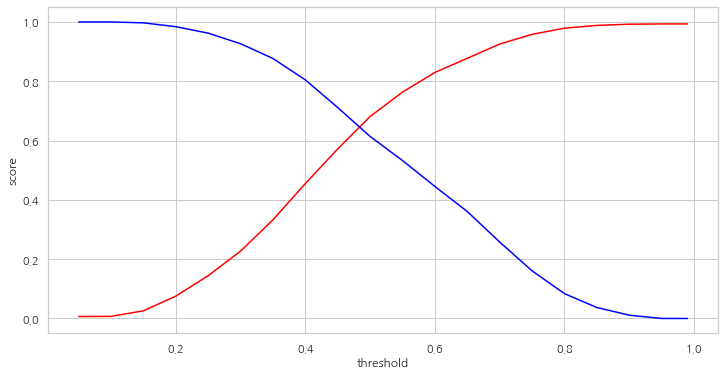

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize = (12, 6))

plt.plot(df_thres.index, df_thres['accuracy'], color = 'red')
plt.plot(df_thres.index, df_thres['recall'], color = 'blue')

plt.xlabel('threshold')
plt.ylabel('score')
plt.grid(True)
plt.show()

##### precision, recall 그리드

In [ ]:
test_y_prob = lr_clf1.predict_proba(test_X2)
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  test_y_pred_prob = np.zeros(len(test_y_prob))

  for i in range(len(test_y_prob)) :
    if test_y_prob[i][1] > thres :
      test_y_pred_prob[i] = 1
  
  tp = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fn = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fp = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tn = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  precision = tp / (tp + fp)
  recall = tn / (fp + tn)

  df_thres.loc[thres, 'precision'] = precision
  df_thres.loc[thres, 'recall'] = recall

NameError: name 'lr_clf1' is not defined

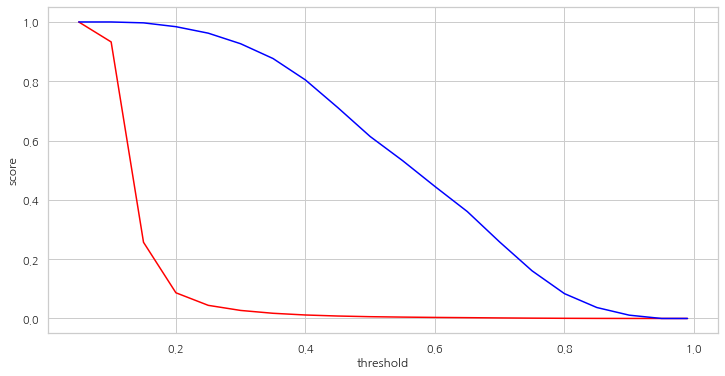

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize = (12, 6))

plt.plot(df_thres.index, df_thres['precision'], color = 'red')
plt.plot(df_thres.index, df_thres['recall'], color = 'blue')

plt.xlabel('threshold')
plt.ylabel('score')
plt.grid(True)
plt.show()

### threshold 확인

In [ ]:
df_thres[['precision','recall']]

,precision,recall
0.05000,1.00000,1.00000
0.10000,0.93267,1.00000
0.15000,0.25692,0.99699
0.20000,0.08666,0.98410
0.25000,0.04427,0.96218
0.30000,0.02708,0.92651
0.35000,0.01750,0.87667
0.40000,0.01175,0.80447
0.45000,0.00827,0.71122
0.50000,0.00599,0.61367


In [ ]:
df_thres[['recall']]

,recall
0.05000,1.00000
0.10000,1.00000
0.15000,0.99699
0.20000,0.98410
0.25000,0.96218
0.30000,0.92651
0.35000,0.87667
0.40000,0.80447
0.45000,0.71122
0.50000,0.61367


### threshold조정을 통한 LR

In [ ]:
model = sm.Logit(train_y_us, train_X_us)
results = model.fit(method="newton")

Optimization terminated successfully.
         Current function value: 0.608280
         Iterations 6


LinAlgError: Singular matrix

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 해지여부_y   No. Observations:                18846
Model:                          Logit   Df Residuals:                    18827
Method:                           MLE   Df Model:                           18
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  0.1029
Time:                        12:46:29   Log-Likelihood:                -11719.
converged:                       True   LL-Null:                       -13063.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
상품명글룹_프리미엄                    0.1881      0.040      4.712      0.000       0.110       0.266
약정종류_약정승계                     0.0419      0.039      1.075      0.282      -0.035       0.118
약정종류_재약정                     -0.2034      0.043     -4.702      0.000      -0.288      -0.119
셑탑1개월유지여부_Y                   0.5173      0.048     10.667      0.000       0.422       0.612
가입경로명_현장경로                   -0.1610      0.034     -4.756      0.000      -0.227      -0.095
약정종료_약정 만료 전 12개월이상          -0.7701      0.043    -18.118      0.000      -0.853      -0.687
약정종료_약정 만료 전 3~6개월           -1.1537      0.111    -10.360      0.000      -1.372      -0.935
약정종료_약정 만료 전 6~9개월           -0.9361      0.102     -9.178      0.000      -1.136      -0.736
약정종료_약정 만료 후 0~3개월            0.4714      0.073      6.498      0.000       0.329       0.614
TV가입_2건                      -0.2103      0.032     -6.507      0.000      -0.274      -0.147
총인터넷가입_1건                     0.1731      0.121      1.431      0.152      -0.064       0.410
번들상품가입여부_Y                    0.2157      0.119      1.806      0.071      -0.018       0.450
VOC1개월발생여부_Y                  0.9344      0.044     21.163      0.000       0.848       1.021
채널이용증가여부_증가                  -0.1420      0.041     -3.452      0.001      -0.223      -0.061
선호채널_KBS1                    -0.1563      0.056     -2.801      0.005      -0.266      -0.047
선호채널_기타                       0.4280      0.032     13.267      0.000       0.365       0.491
채널시간대별평균1달시간_Category_3~4    -0.3463      0.042     -8.304      0.000      -0.428      -0.265
채널시간대별평균1달시간_Category_5~7    -0.4150      0.043     -9.636      0.000      -0.499      -0.331
채널시간대별평균1달시간_Category_8~     -0.6155      0.045    -13.768      0.000      -0.703      -0.528
=============================================================================================
"""

In [ ]:
np.exp(results.params)

상품명글룹_프리미엄                  1.20695
약정종류_약정승계                   1.04282
약정종류_재약정                    0.81594
셑탑1개월유지여부_Y                 1.67742
가입경로명_현장경로                  0.85128
약정종료_약정 만료 전 12개월이상         0.46297
약정종료_약정 만료 전 3~6개월          0.31548
약정종료_약정 만료 전 6~9개월          0.39215
약정종료_약정 만료 후 0~3개월          1.60225
TV가입_2건                     0.81038
총인터넷가입_1건                   1.18902
번들상품가입여부_Y                  1.24072
VOC1개월발생여부_Y                2.54566
채널이용증가여부_증가                 0.86766
선호채널_KBS1                   0.85526
선호채널_기타                     1.53413
채널시간대별평균1달시간_Category_3~4   0.70727
채널시간대별평균1달시간_Category_5~7   0.66032
채널시간대별평균1달시간_Category_8~    0.54038
dtype: float64

In [ ]:
pred_y = results.predict(test_X1)
pred_y

0        0.37682
1        0.29092
2        0.61010
3        0.46779
4        0.38665
           ...  
349975   0.39771
349976   0.47040
349977   0.45816
349978   0.79156
349979   0.21713
Length: 349980, dtype: float64

In [ ]:
def cut_off(y,threshold=0.5):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

0         0
1         0
2         1
3         0
4         0
         ..
349975    0
349976    0
349977    0
349978    1
349979    0
Length: 349980, dtype: int64

In [ ]:
cfmat = confusion_matrix(test_y, pred_Y) #혼동행렬 계산
print((cfmat[0,0]+cfmat[1,1])/(cfmat[0,0]+cfmat[0,1]+cfmat[1,0]+cfmat[1,1])) #정확도
print((cfmat[1,1]) / (cfmat[0,1] + cfmat[1,1]))
print((cfmat[1,1])/(cfmat[1,1]+cfmat[1,0]))

0.6803245899765701
0.012720948644729703
0.6145251396648045


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

AUC: 0.7051051852303701


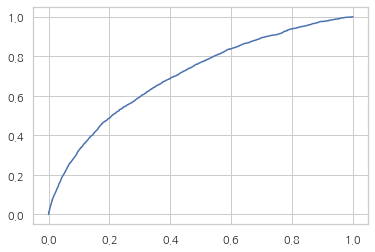

In [ ]:
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)
plt.plot(fpr,tpr)

#AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


AUC: 0.9463923891858513

## LR by LASSO 선택법 with stratified k-fold 교차 검증 방법

In [ ]:
# from sklearn.model_selection import StratifiedKFold

# skf = StratifiedKFold(n_splits=3)

# df_raw = pd.DataFrame(data=df_raw, columns=df_raw.columns)
# df_raw['해지여부_y'].value_counts()

0    1738149
1      11750
Name: 해지여부_y, dtype: int64

In [ ]:
# n_iter=0

# for train_index, test_index in skf.split(df_raw, df_raw['해지여부_y']):
#     n_iter +=1
#     label_train = df_raw['해지여부_y'].iloc[train_index]
#     label_test = df_raw['해지여부_y'].iloc[test_index]
#     print('## 교차 검증:{0}'.format(n_iter))
#     print('학습 레이블 데이터 분포:\n', label_train.value_counts())
#     print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증:1
학습 레이블 데이터 분포:
 0    1158766
1       7833
Name: 해지여부_y, dtype: int64
검증 레이블 데이터 분포:
 0    579383
1      3917
Name: 해지여부_y, dtype: int64
## 교차 검증:2
학습 레이블 데이터 분포:
 0    1158766
1       7833
Name: 해지여부_y, dtype: int64
검증 레이블 데이터 분포:
 0    579383
1      3917
Name: 해지여부_y, dtype: int64
## 교차 검증:3
학습 레이블 데이터 분포:
 0    1158766
1       7834
Name: 해지여부_y, dtype: int64
검증 레이블 데이터 분포:
 0    579383
1      3916
Name: 해지여부_y, dtype: int64


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
# # iris = load_iris()
# # data = iris.data
# # label = iris.target
# dt_clf = DecisionTreeClassifier(random_state=55)

In [ ]:
# score = cross_val_score(dt_clf, test_y, test_y_pred, scoring='recall', cv=3)

# print('교차 검증별 정확도:', np.round(score, 4))
# print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차 검증별 정확도: [0.0091 0.0093 0.0087]
평균 검증 정확도: 0.009


In [ ]:
# # Train Set 및 Test Set 추출
# lasso_selected = ['SMS수신불류명_미응답', 'SMS수신불류명_수신', 'SMS수신불류명_전체거부', 'SVOD가입건수_1건',
#        'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', 'TV가입_2건', 'TV가입_3건 이상',
#        'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건', 'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y',
#        '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담', '가입경로명_임직원',
#        '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로', '구상품여부_Y',
#        '기가인터넷가입건수_1건 이상', '디지털가입_2건', '디지털가입_3건 이상', '디지털기가가입여부_Y',
#        '디지털아날로그여부_Y', '미디어그룹명_UHD', '번들상품가입여부_Y', '상품명글룹_베이직', '상품명글룹_세이버',
#        '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '서비스이용일그룹_24개월~36개월미만',
#        '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만',
#        '선호채널_JTBC', '선호채널_KBS1', '선호채널_KBS2', '선호채널_MBC', '선호채널_MBN',
#        '선호채널_OCN', '선호채널_SBS', '선호채널_TV조선', '선호채널_TV조선2', '선호채널_YTN',
#        '선호채널_tvN', '선호채널_기타', '선호채널_연합뉴스TV', '선호채널_헬로방송', '셑탑1개월유지여부_Y',
#        '아날로그가입_1건 이상', '아이들나라PV_1건 이상', '아이들나라VOD이용여부_1건 이상', '아이들나라이용여부_Y',
#        '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월',
#        '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상',
#        '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월',
#        '약정종류_약정갱신', '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정',
#        '유료채널가입그룹_1건', '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '이메일수신분류명_미응답',
#        '이메일수신분류명_수신', '이메일수신분류명_전체거부', '채널시간대별평균1달시간_Category_3~4',
#        '채널시간대별평균1달시간_Category_5~7', '채널시간대별평균1달시간_Category_8~', '채널이용증가여부_비슷',
#        '채널이용증가여부_시청없음', '채널이용증가여부_증가', '총이용일수_Category_1709~2452',
#        '총이용일수_Category_2453~3041', '총이용일수_Category_3042~', '총인터넷가입_1건',
#        '총인터넷가입_2건 이상']

# train_X_us2 = train_X_us[lasso_selected]
# test_X3 = test_X[lasso_selected]

In [ ]:
# # # Random Forest 모델 생성
# # rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 8, max_features = 'auto', min_samples_split = 6, random_state = 123)    # n_estimators는 생성할 Tree의 개수. 개수가 많을수록 정확도가 올라가지만 모델 학습 시간이 길어짐

# # 모델 학습 진행
# dt_clf.fit(train_X_us2, train_y_us)

# # 모델 정확도 확인
# train_y_pred = dt_clf.predict(train_X_us2)
# test_y_pred = dt_clf.predict(test_X3)

# print_score(train_y_us, train_y_pred, train = True)
# print_score(test_y, test_y_pred, train = False)

Train Result:
Accuracy Score: 96.66%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision    0.95153    0.98276   0.96662     0.96715       0.96715
recall       0.98334    0.94991   0.96662     0.96662       0.96662
f1-score     0.96717    0.96606   0.96662     0.96661       0.96661
support   9423.00000 9423.00000   0.96662 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[9266  157]
 [ 472 8951]]

Test Result:
Accuracy Score: 58.60%
_______________________________________________
CLASSIFICATION REPORT:
                     0          1  accuracy    macro avg  weighted avg
precision      0.99505    0.00905   0.58596      0.50205       0.98850
recall         0.58610    0.56468   0.58596      0.57539       0.58596
f1-score       0.73769    0.01781   0.58596      0.37775       0.73291
support   347653.00000 2327.00000   0.58596 349980.00000  349980.

#### 로지스틱 회귀분석 수식 시각화 진행

##### statsmodel연습

In [ ]:
# X = sm.add_constant(train_X_us2)
# model = sm.Logit(train_y_us, X)
# results = model.fit()
# print(results.summary())

In [ ]:
import statsmodels.api as sm

feature_columns = list(df_raw.columns.difference(['해지여부_y']))

X = df_raw[feature_columns]
y = df_raw["해지여부_y"]

# for b0, 상수항 추가
X = sm.add_constant(X, has_constant = "add")

logit = sm.Logit(y, X)
result = logit.fit()
result.summary2()

/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/ljy1115/.local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                    Results: Logit
======================================================================================================================
Model:                                 Logit                               Pseudo R-squared:                    inf   
Dependent Variable:                    해지여부_y                              AIC:                                 inf   
Date:                                  2022-06-13 16:24                    BIC:                                 inf   
No. Observations:                      1749899                             Log-Likelihood:                      -inf  
Df Model:                              85                                  LL-Null:                             0.0000
Df Residuals:                          1749813                             LLR p-value:                         1.0000
Converged:                             0.0000                              Scale:                               1.0000
No. Iterations:                        35.0000                                                                        
----------------------------------------------------------------------------------------------------------------------
                            Coef.         Std.Err.           z     P>|z|          [0.025                 0.975]       
----------------------------------------------------------------------------------------------------------------------
const                      -26.4598         2697257.5377   -0.0000 1.0000          -5286554.0907          5286501.1712
SMS수신불류명_미응답                -0.3768               0.1631   -2.3104 0.0209                -0.6964               -0.0571
SMS수신불류명_수신                 -0.1170               0.0587   -1.9941 0.0461                -0.2319               -0.0020
SMS수신불류명_전체거부               -0.0206               0.0716   -0.2879 0.7735                -0.1610                0.1198
SVOD가입건수_1건                  0.2386               0.0508    4.6932 0.0000                 0.1389                0.3382
SVOD가입건수_2건                  0.5308               0.0922    5.7583 0.0000                 0.3501                0.7115
SVOD가입건수_3건 이상               0.4910               0.1335    3.6766 0.0002                 0.2292                0.7527
TV가입_2건                     -0.5064                  nan       nan    nan                    nan                   nan
TV가입_3건 이상                  -0.7892               0.3477   -2.2697 0.0232                -1.4708               -0.1077
TV인터넷가입건수_2건                 0.1850               0.0730    2.5344 0.0113                 0.0419                0.3280
TV인터넷가입건수_3건                 0.4228               0.1799    2.3497 0.0188                 0.0701                0.7754
TV인터넷가입건수_4건 이상              0.5137               0.2158    2.3802 0.0173                 0.0907                0.9366
VOC1개월발생여부_Y                 0.9275               0.0251   36.8978 0.0000                 0.8782                0.9768
가입경로명_O/B                   -0.1456               0.0297   -4.8956 0.0000                -0.2038               -0.0873
가입경로명_기타                    -0.1554               0.1958   -0.7936 0.4274                -0.5392                0.2284
가입경로명_렌탈제휴                  -3.0479              10.1731   -0.2996 0.7645               -22.9869               16.8911
가입경로명_일반상담                  -0.1153               0.0280   -4.1113 0.0000                -0.1703               -0.0603
가입경로명_임직원                   -0.8479               0.1596   -5.3133 0.0000                -1.1607               -0.5351
가입경로명_전략채널                  -0.6593               0.2464   -2.6757 0.0075                -1.1422               -0.1764
가입경로명_정보없음                   0.0973               0.2072    0.4698 0.6385                -0.3087                0.5034
가입경로명_직영몰                   -0.1514               0.0739   -2.0481 0.0405   

In [ ]:
df_raw.columns

Index(['서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상', '서비스이용일그룹_6개월~12개월미만',
       '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직', '상품명글룹_세이버', '상품명글룹_스탠다드',
       '상품명글룹_이코노미', '상품명글룹_프리미엄', '구상품여부_Y', '약정종류_약정갱신', '약정종류_약정승계',
       '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y', 'SVOD가입건수_1건',
       'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건', '유료채널가입그룹_2건',
       '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴', '가입경로명_일반상담',
       '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰', '가입경로명_현장경로',
       '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월',
       '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월', '약정종료_약정 만료 후 12개월이상',
       '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월', '약정종료_약정 만료 후 9~12개월',
       'TV가입_2건', 'TV가입_3건 이상', '아날로그가입_1건 이상', '디지털가입_2건', '디지털가입_3건 이상',
       '총인터넷가입_1건', '총인터넷가입_2건 이상', '기가인터넷가입건수_1건 이상', '번들상품가입여부_Y',
       '디지털기가가입여부_Y', '디지털아날로그여부_Y', 'TV인터넷가입건수_2건', 'TV인터넷가입건수_3건',
       'TV인터넷가입건수_4건 이상', 'VOC1개월발생여부_Y',

In [ ]:
from statsmodels.formula.api import logit

In [ ]:
# logit('해지여부_y~서비스이용일그룹_24개월~36개월미만+서비스이용일그룹_36개월 이상+서비스이용일그룹_6개월~12개월미만+서비스이용일그룹_6개월미만+미디어그룹명_UHD+상품명글룹_베이직+상품명글룹_세이버+상품명글룹_스탠다드+상품명글룹_이코노미+상품명글룹_프리미엄+구상품여부_Y+약정종류_약정갱신+약정종류_약정승계+약정종류_약정연장+약정종류_약정축소+약정종류_재약정+셑탑1개월유지여부_Y+SVOD가입건수_1건+SVOD가입건수_2건+SVOD가입건수_3건 이상+유료채널가입그룹_1건+유료채널가입그룹_2건+유료채널가입그룹_3건 이상+가입경로명_O/B+가입경로명_기타+가입경로명_렌탈제휴+가입경로명_일반상담+가입경로명_임직원+가입경로명_전략채널+가입경로명_정보없음+가입경로명_직영몰+가입경로명_현장경로+약정종료_약정 만료 전 12개월이상+약정종료_약정 만료 전 3~6개월+약정종료_약정 만료 전 6~9개월+약정종료_약정 만료 전 9~12개월+약정종료_약정 만료 후 0~3개월+약정종료_약정 만료 후 12개월이상+약정종료_약정 만료 후 3~6개월+약정종료_약정 만료 후 6~9개월+약정종료_약정 만료 후 9~12개월+TV가입_2건+TV가입_3건 이상+아날로그가입_1건 이상+디지털가입_2건+디지털가입_3건 이상+총인터넷가입_1건+총인터넷가입_2건 이상+기가인터넷가입건수_1건 이상+번들상품가입여부_Y+디지털기가가입여부_Y+디지털아날로그여부_Y+TV인터넷가입건수_2건+TV인터넷가입건수_3건+TV인터넷가입건수_4건 이상+VOC1개월발생여부_Y+이메일수신분류명_미응답+이메일수신분류명_수신+이메일수신분류명_전체거부+SMS수신불류명_미응답+SMS수신불류명_수신+SMS수신불류명_전체거부+채널이용증가여부_비슷+채널이용증가여부_시청없음+채널이용증가여부_증가+선호채널_JTBC+선호채널_KBS1+선호채널_KBS2+선호채널_MBC+선호채널_MBN+선호채널_OCN+선호채널_SBS+선호채널_TV조선+선호채널_TV조선2+선호채널_YTN+선호채널_tvN+선호채널_기타+선호채널_연합뉴스TV+선호채널_헬로방송+아이들나라PV_1건 이상+아이들나라이용여부_Y+아이들나라VOD이용여부_1건 이상+해지여부_y+총이용일수_Category_1709~2452+총이용일수_Category_2453~3041+총이용일수_Category_3042~+채널시간대별평균1달시간_Category_3~4+채널시간대별평균1달시간_Category_5~7+채널시간대별평균1달시간_Category_8~', data=df_raw).fit().summary()

In [ ]:
import statsmodels.api as sm

In [ ]:
# # 모델 학습 진행
# result = lr_clf1.fit(train_X_us2, train_y_us)

In [ ]:
# lasso_selected = ['채널시간대별평균1달시간', '상품명글룹_프리미엄', '약정종류_약정승계', '약정종류_재약정', '셑탑1개월유지여부_Y',
#  '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월',
#  '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 후 0~3개월', '번들상품가입여부_Y', 'VOC1개월발생여부_Y',
#  '채널이용증가여부_증가', '선호채널_KBS1', '선호채널_기타']

In [ ]:
result.coef_

array([[-0.02702108, -1.53610641,  0.1729812 , -0.00468152, -0.22854449,
         0.55782644, -0.18905467, -0.80904366, -1.15309561, -0.95238418,
         0.44918011,  0.34739963,  0.91313641, -0.19777312, -0.18936075,
         0.41717237]])

In [ ]:
# result.intercept_

array([-0.03135111])

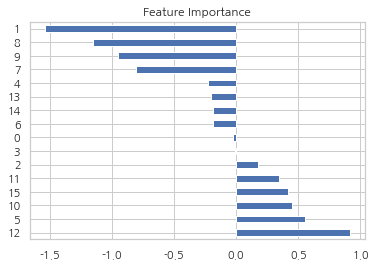

In [ ]:
lr_clf1.fit(train_X_us2, train_y_us)
importance = lr_clf1.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance');

In [ ]:
importance

array([-0.02702108, -1.53610641,  0.1729812 , -0.00468152, -0.22854449,
        0.55782644, -0.18905467, -0.80904366, -1.15309561, -0.95238418,
        0.44918011,  0.34739963,  0.91313641, -0.19777312, -0.18936075,
        0.41717237])

In [ ]:
pd.Series(importance)

0    -0.02702
1    -1.53611
2     0.17298
3    -0.00468
4    -0.22854
5     0.55783
6    -0.18905
7    -0.80904
8    -1.15310
9    -0.95238
10    0.44918
11    0.34740
12    0.91314
13   -0.19777
14   -0.18936
15    0.41717
dtype: float64

In [ ]:
train_X_us2.columns

Index(['const', '채널시간대별평균1달시간', '상품명글룹_프리미엄', '약정종류_약정승계', '약정종류_재약정',
       '셑탑1개월유지여부_Y', '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상',
       '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 후 0~3개월',
       '번들상품가입여부_Y', 'VOC1개월발생여부_Y', '채널이용증가여부_증가', '선호채널_KBS1', '선호채널_기타'],
      dtype='object')

In [ ]:
result.coef_

array([[-0.02702108, -1.53610641,  0.1729812 , -0.00468152, -0.22854449,
         0.55782644, -0.18905467, -0.80904366, -1.15309561, -0.95238418,
         0.44918011,  0.34739963,  0.91313641, -0.19777312, -0.18936075,
         0.41717237]])

#### 로지스틱 회귀분석 수식

$ y = - 0.02702108 - 1.53610641(채널시간대별평균1달시간) + 0.1729812(상품명글룹_{프리미엄}) - 0.00468152(약정종류_{약정승계}) - 0.22854449(약정종류_{재약정})+ 0.55782644(셑탑1개월유지여부_{Y}) - 0.18905467(가입경로명_{현장경로}) - 0.80904366(약정종료_{약정 만료 전 12개월이상}) - 1.15309561(약정종료_{약정 만료 전 3~6개월})- 0.95238418(약정종료_{약정 만료 전 6~9개월}) + 0.44918011(약정종료_{약정 만료 후 0~3개월}) + 0.34739963(번들상품가입여부_{Y}) + 0.91313641(VOC1개월발생여부_{Y})- 0.19777312(채널이용증가여부_{증가}) - 0.18936075(선호채널_{KBS1}) + 0.41717237(선호채널_{기타})$

### LR by 전진선택법

In [ ]:
fwd_selected = ['유료채널가입그룹_1건',
'선호채널_tvN',
'가입경로명_직영몰',
'가입경로명_현장경로',
'선호채널_SBS',
'총이용일수',
'유료채널가입그룹_2건',
'SVOD가입건수_2건',
'가입경로명_임직원',
'가입경로명_O/B',
'SVOD가입건수_3건 이상',
'SVOD가입건수_1건',
'가입경로명_기타',
'서비스이용일그룹_6개월~12개월미만',
'서비스이용일그룹_6개월미만',
'약정종료_약정 만료 후 9~12개월',
'디지털가입',
'선호채널_MBN',
'선호채널_OCN',
'선호채널_TV조선',
'선호채널_TV조선2',
'가입경로명_일반상담',
'가입경로명_렌탈제휴']

In [ ]:
# Train Set 및 Test Set 추출
train_X_us2 = train_X_us[fwd_selected]
test_X2 = test_X[fwd_selected]

train_X_us2 = sm.add_constant(train_X_us2, has_constant = "add")    # 상수항 컬럼 더하기
test_X2 = sm.add_constant(test_X2, has_constant = "add")    # 상수항 컬럼 더하기

KeyError: "['총이용일수', '디지털가입'] not in index"

In [ ]:
# Cross Validation 진행 (5-fold)
warnings.filterwarnings(action='ignore')

k = 5
lr_clf = LogisticRegression() 
cv_result = cross_val_score(lr_clf, train_X_us2, train_y_us, cv = k)    # uses R^2 as score 

print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

warnings.filterwarnings(action='default')

CV Scores:  [0.54562334 0.53701247 0.54178827 0.53515521 0.5492173 ]
CV scores average:  0.5417593195361011


In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf1 = LogisticRegression()

# 모델 학습 진행
lr_clf1.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = lr_clf1.predict(train_X_us2)
test_y_pred = lr_clf1.predict(test_X2)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

Train Result:
Accuracy Score: 54.51%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision    0.54574    0.54448   0.54510     0.54511       0.54511
recall       0.53815    0.55205   0.54510     0.54510       0.54510
f1-score     0.54192    0.54824   0.54510     0.54508       0.54508
support   9423.00000 9423.00000   0.54510 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[5071 4352]
 [4221 5202]]

Test Result:
Accuracy Score: 53.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0        1.0  accuracy    macro avg  weighted avg
precision      0.99470    0.00822   0.53948      0.50146       0.98814
recall         0.53927    0.57069   0.53948      0.55498       0.53948
f1-score       0.69938    0.01621   0.53948      0.35780       0.69484
support   347653.00000 2327.00000   0.53948 349980.00000  349980.

In [ ]:
test_y_prob = lr_clf1.predict_proba(test_X2)
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  test_y_pred_prob = np.zeros(len(test_y_prob))

  for i in range(len(test_y_prob)) :
    if test_y_prob[i][1] > thres :
      test_y_pred_prob[i] = 1
  
  tn = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fp = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fn = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tp = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  accuracy = (tp + tn) / (tp + fn + fp + tn)
  recall = tp / (tp + fn)

  df_thres.loc[thres, 'accuracy'] = accuracy
  df_thres.loc[thres, 'recall'] = recall

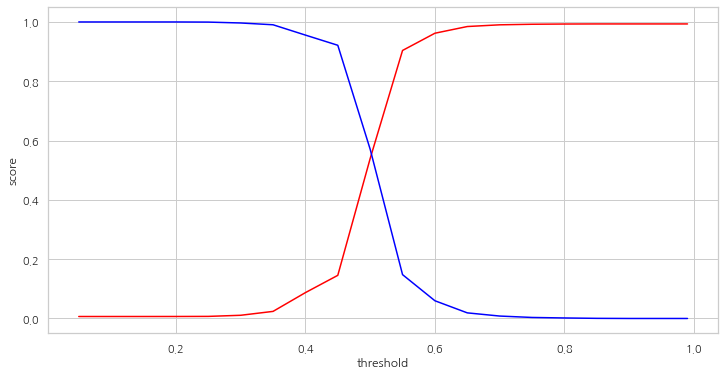

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize = (12, 6))

plt.plot(df_thres.index, df_thres['accuracy'], color = 'red')
plt.plot(df_thres.index, df_thres['recall'], color = 'blue')

plt.xlabel('threshold')
plt.ylabel('score')
plt.grid(True)
plt.show()

### LR by 후진선택법

In [ ]:
bwd_selected = ['유료채널가입그룹_1건',
'선호채널_tvN',
'가입경로명_직영몰',
'가입경로명_현장경로',
'선호채널_SBS',
'총이용일수',
'유료채널가입그룹_2건',
'SVOD가입건수_2건',
'가입경로명_임직원',
'가입경로명_O/B',
'SVOD가입건수_3건 이상',
'SVOD가입건수_1건',
'가입경로명_기타',
'서비스이용일그룹_6개월~12개월미만',
'서비스이용일그룹_6개월미만',
'약정종료_약정 만료 후 9~12개월',
'디지털가입',
'선호채널_MBN',
'선호채널_OCN',
'선호채널_TV조선',
'선호채널_TV조선2',
'가입경로명_일반상담',
'가입경로명_렌탈제휴']

In [ ]:
# Train Set 및 Test Set 추출
train_X_us2 = train_X_us[bwd_selected]
test_X2 = test_X[bwd_selected]

train_X_us2 = sm.add_constant(train_X_us2, has_constant = "add")    # 상수항 컬럼 더하기
test_X2 = sm.add_constant(test_X2, has_constant = "add")    # 상수항 컬럼 더하기

In [ ]:
# Cross Validation 진행 (5-fold)
warnings.filterwarnings(action='ignore')

k = 5
lr_clf = LogisticRegression() 
cv_result = cross_val_score(lr_clf, train_X_us2, train_y_us, cv = k)    # uses R^2 as score 

print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

warnings.filterwarnings(action='default')

CV Scores:  [0.54562334 0.53701247 0.54178827 0.53515521 0.5492173 ]
CV scores average:  0.5417593195361011


In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf1 = LogisticRegression()

# 모델 학습 진행
lr_clf1.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = lr_clf1.predict(train_X_us2)
test_y_pred = lr_clf1.predict(test_X2)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

Train Result:
Accuracy Score: 54.51%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision    0.54574    0.54448   0.54510     0.54511       0.54511
recall       0.53815    0.55205   0.54510     0.54510       0.54510
f1-score     0.54192    0.54824   0.54510     0.54508       0.54508
support   9423.00000 9423.00000   0.54510 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[5071 4352]
 [4221 5202]]

Test Result:
Accuracy Score: 53.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0        1.0  accuracy    macro avg  weighted avg
precision      0.99470    0.00822   0.53948      0.50146       0.98814
recall         0.53927    0.57069   0.53948      0.55498       0.53948
f1-score       0.69938    0.01621   0.53948      0.35780       0.69484
support   347653.00000 2327.00000   0.53948 349980.00000  349980.

In [ ]:
test_y_prob = lr_clf1.predict_proba(test_X2)
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  test_y_pred_prob = np.zeros(len(test_y_prob))

  for i in range(len(test_y_prob)) :
    if test_y_prob[i][1] > thres :
      test_y_pred_prob[i] = 1
  
  tn = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fp = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fn = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tp = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  accuracy = (tp + tn) / (tp + fn + fp + tn)
  recall = tp / (tp + fn)

  df_thres.loc[thres, 'accuracy'] = accuracy
  df_thres.loc[thres, 'recall'] = recall

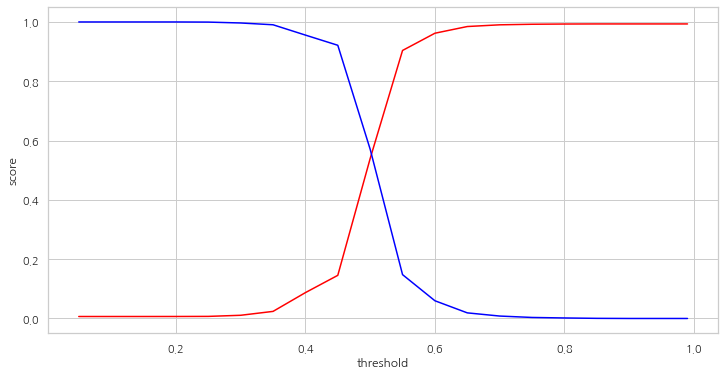

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize = (12, 6))

plt.plot(df_thres.index, df_thres['accuracy'], color = 'red')
plt.plot(df_thres.index, df_thres['recall'], color = 'blue')

plt.xlabel('threshold')
plt.ylabel('score')
plt.grid(True)
plt.show()

### LR by Stepwise

In [ ]:
stpws_selected = ['유료채널가입그룹_1건',
'선호채널_tvN',
'가입경로명_직영몰',
'가입경로명_현장경로',
'선호채널_SBS',
'총이용일수',
'유료채널가입그룹_2건',
'SVOD가입건수_2건',
'가입경로명_임직원',
'가입경로명_O/B',
'SVOD가입건수_3건 이상',
'SVOD가입건수_1건',
'가입경로명_기타',
'서비스이용일그룹_6개월~12개월미만',
'서비스이용일그룹_6개월미만',
'약정종료_약정 만료 후 9~12개월',
'디지털가입',
'선호채널_MBN',
'선호채널_OCN',
'선호채널_TV조선',
'선호채널_TV조선2',
'가입경로명_일반상담',
'가입경로명_렌탈제휴']

In [ ]:
# Train Set 및 Test Set 추출
train_X_us2 = train_X_us[bwd_selected]
test_X2 = test_X[bwd_selected]

train_X_us2 = sm.add_constant(train_X_us2, has_constant = "add")    # 상수항 컬럼 더하기
test_X2 = sm.add_constant(test_X2, has_constant = "add")    # 상수항 컬럼 더하기

In [ ]:
# Cross Validation 진행 (5-fold)
warnings.filterwarnings(action='ignore')

k = 5
lr_clf = LogisticRegression() 
cv_result = cross_val_score(lr_clf, train_X_us2, train_y_us, cv = k)    # uses R^2 as score 

print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

warnings.filterwarnings(action='default')

CV Scores:  [0.54562334 0.53701247 0.54178827 0.53515521 0.5492173 ]
CV scores average:  0.5417593195361011


In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf1 = LogisticRegression()

# 모델 학습 진행
lr_clf1.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = lr_clf1.predict(train_X_us2)
test_y_pred = lr_clf1.predict(test_X2)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

Train Result:
Accuracy Score: 54.51%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision    0.54574    0.54448   0.54510     0.54511       0.54511
recall       0.53815    0.55205   0.54510     0.54510       0.54510
f1-score     0.54192    0.54824   0.54510     0.54508       0.54508
support   9423.00000 9423.00000   0.54510 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[5071 4352]
 [4221 5202]]

Test Result:
Accuracy Score: 53.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0        1.0  accuracy    macro avg  weighted avg
precision      0.99470    0.00822   0.53948      0.50146       0.98814
recall         0.53927    0.57069   0.53948      0.55498       0.53948
f1-score       0.69938    0.01621   0.53948      0.35780       0.69484
support   347653.00000 2327.00000   0.53948 349980.00000  349980.

In [ ]:
test_y_prob = lr_clf1.predict_proba(test_X2)
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  test_y_pred_prob = np.zeros(len(test_y_prob))

  for i in range(len(test_y_prob)) :
    if test_y_prob[i][1] > thres :
      test_y_pred_prob[i] = 1
  
  tn = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fp = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fn = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tp = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  accuracy = (tp + tn) / (tp + fn + fp + tn)
  recall = tp / (tp + fn)

  df_thres.loc[thres, 'accuracy'] = accuracy
  df_thres.loc[thres, 'recall'] = recall

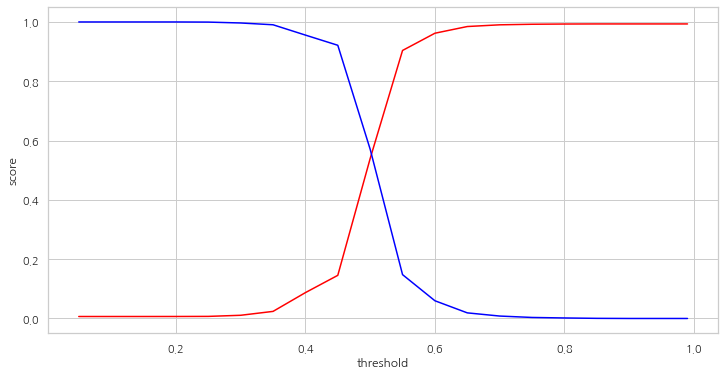

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize = (12, 6))

plt.plot(df_thres.index, df_thres['accuracy'], color = 'red')
plt.plot(df_thres.index, df_thres['recall'], color = 'blue')

plt.xlabel('threshold')
plt.ylabel('score')
plt.grid(True)
plt.show()

### 변수 선택법 없이 로지스틱 실행

In [ ]:
selected = ['총이용일수', '디지털가입', '총인터넷가입', '기가인터넷가입건수', '채널시간대별평균1달시간', '아이들나라PV',
       '아이들나라VOD이용여부', '서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상',
       '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직',
       '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '약정종류_약정갱신',
       '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y',
       'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건',
       '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴',
       '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰',
       '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월',
       '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월',
       '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월',
       '약정종료_약정 만료 후 9~12개월', '번들상품가입여부_Y', 'VOC1개월발생여부_Y', '채널이용증가여부_비슷',
       '채널이용증가여부_시청없음', '채널이용증가여부_증가']

In [ ]:
# Train Set 및 Test Set 추출
train_X_us2 = train_X_us[selected]
test_X2 = test_X[selected]

train_X_us2 = sm.add_constant(train_X_us2, has_constant = "add")    # 상수항 컬럼 더하기
test_X2 = sm.add_constant(test_X2, has_constant = "add")    # 상수항 컬럼 더하기

In [ ]:
# Cross Validation 진행 (5-fold)
warnings.filterwarnings(action='ignore')

k = 5
lr_clf = LogisticRegression() 
cv_result = cross_val_score(lr_clf, train_X_us2, train_y_us, cv = k)    # uses R^2 as score 

print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

warnings.filterwarnings(action='default')

CV Scores:  [0.66100796 0.65348899 0.64393738 0.64924383 0.65083577]
CV scores average:  0.6517027854625864


In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf1 = LogisticRegression()

# 모델 학습 진행
lr_clf1.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = lr_clf1.predict(train_X_us2)
test_y_pred = lr_clf1.predict(test_X2)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Result:
Accuracy Score: 65.48%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision    0.64411    0.66728   0.65483     0.65570       0.65570
recall       0.69203    0.61764   0.65483     0.65483       0.65483
f1-score     0.66721    0.64150   0.65483     0.65436       0.65436
support   9423.00000 9423.00000   0.65483 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[6521 2902]
 [3603 5820]]

Test Result:
Accuracy Score: 69.55%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0        1.0  accuracy    macro avg  weighted avg
precision      0.99633    0.01341   0.69551      0.50487       0.98980
recall         0.69604    0.61710   0.69551      0.65657       0.69551
f1-score       0.81954    0.02624   0.69551      0.42289       0.81427
support   347653.00000 2327.00000   0.69551 349980.00000  349980.

In [ ]:
test_y_prob = lr_clf1.predict_proba(test_X2)
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  test_y_pred_prob = np.zeros(len(test_y_prob))

  for i in range(len(test_y_prob)) :
    if test_y_prob[i][1] > thres :
      test_y_pred_prob[i] = 1
  
  tn = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fp = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fn = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tp = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  accuracy = (tp + tn) / (tp + fn + fp + tn)
  recall = tp / (tp + fn)

  df_thres.loc[thres, 'accuracy'] = accuracy
  df_thres.loc[thres, 'recall'] = recall

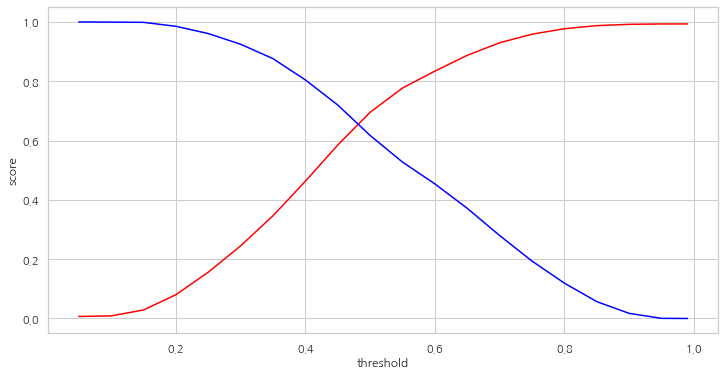

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize = (12, 6))

plt.plot(df_thres.index, df_thres['accuracy'], color = 'red')
plt.plot(df_thres.index, df_thres['recall'], color = 'blue')

plt.xlabel('threshold')
plt.ylabel('score')
plt.grid(True)
plt.show()

In [ ]:
corr_unstack = corr_df.unstack()
corr_unstack

In [ ]:
# seaborn 한글 폰트 설정
# path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
# 변수끼리의 상관성 확인

plt.figure(figsize=(30, 20))
sns.heatmap(corr_df, annot=True, linewidths=1, cmap='viridis');

### RF by LASSO 선택법

In [ ]:
# Train Set 및 Test Set 추출
lasso_selected = ['상품명글룹_프리미엄', '약정종류_약정승계', '약정종류_재약정', '셑탑1개월유지여부_Y', '가입경로명_현장경로',
 '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월', '약정종료_약정 만료 전 6~9개월',
 '약정종료_약정 만료 후 0~3개월', 'TV가입_2건', '총인터넷가입_1건', '번들상품가입여부_Y', 'VOC1개월발생여부_Y',
 '채널이용증가여부_증가', '선호채널_KBS1', '선호채널_기타', '채널시간대별평균1달시간_Category_3~4',
 '채널시간대별평균1달시간_Category_5~7', '채널시간대별평균1달시간_Category_8~']

train_X_us2 = train_X_us[lasso_selected]
test_X3 = test_X[lasso_selected]

In [ ]:
lasso_selected = ['선호채널_KBS1',
'셑탑1개월유지여부_Y',
'VOC1개월발생여부_Y',
'약정종료_약정 만료 전 0~3개월',
'약정종료_약정 만료 후 0~3개월',
'가입경로명_임직원',
'채널이용증가여부_비슷']

train_X_us2 = train_X_us[lasso_selected]
test_X3 = test_X[lasso_selected]

NameError: name 'train_X_us' is not defined

In [ ]:
# Random Forest 모델 생성
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 8, max_features = 'auto', min_samples_split = 6, random_state = 123)    # n_estimators는 생성할 Tree의 개수. 개수가 많을수록 정확도가 올라가지만 모델 학습 시간이 길어짐

# 모델 학습 진행
rf_clf.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = rf_clf.predict(train_X_us2)
test_y_pred = rf_clf.predict(test_X3)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

/tmp/ipykernel_1956144/606861023.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(train_X_us2, train_y_us)
/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 66.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision    0.65728    0.68373   0.66948     0.67051       0.67051
recall       0.70827    0.63069   0.66948     0.66948       0.66948
f1-score     0.68182    0.65614   0.66948     0.66898       0.66898
support   9423.00000 9423.00000   0.66948 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[6674 2749]
 [3480 5943]]

Test Result:
Accuracy Score: 69.20%
_______________________________________________
CLASSIFICATION REPORT:
                     0          1  accuracy    macro avg  weighted avg
precision      0.99611    0.01281   0.69201      0.50446       0.98957
recall         0.69265    0.59605   0.69201      0.64435       0.69201
f1-score       0.81711    0.02509   0.69201      0.42110       0.81185
support   347653.00000 2327.00000   0.69201 349980.00000  349980.

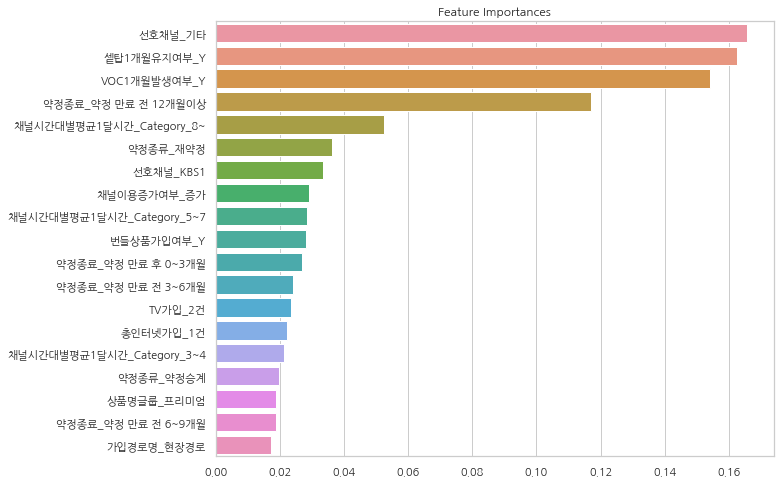

In [ ]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = test_X3.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
sns.barplot(x = ftr_importances, y = ftr_importances.index);

In [ ]:
# # confusion matrix, AUC-ROC 커브 생성
# # AUC 0.8이상이면 good

# disp = plot_confusion_matrix(rf_clf, test_X1, test_y, cmap='Blues', values_format='d', display_labels=['Good', 'Bad'])
# disp = plot_roc_curve(rf_clf, test_X1, test_y)

### GBM by LASSO 선택법

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Train Set 및 Test Set 추출
lasso_selected = [
 '서비스이용일그룹_24개월~36개월미만',
 '서비스이용일그룹_36개월 이상',
 '서비스이용일그룹_6개월~12개월미만',
 '서비스이용일그룹_6개월미만',
 '미디어그룹명_UHD',
 '상품명글룹_베이직',
 '상품명글룹_세이버',
 '상품명글룹_스탠다드',
 '상품명글룹_이코노미',
 '상품명글룹_프리미엄',
 '약정종류_약정갱신',
 '약정종류_약정승계',
 '약정종류_약정연장',
 '약정종류_약정축소',
 '약정종류_재약정',
 '셑탑1개월유지여부_Y',
 'SVOD가입건수_1건',
 'SVOD가입건수_2건',
 'SVOD가입건수_3건 이상',
 '유료채널가입그룹_1건',
 '유료채널가입그룹_2건',
 '유료채널가입그룹_3건 이상',
 '가입경로명_O/B',
 '가입경로명_기타',
 '가입경로명_렌탈제휴',
 '가입경로명_일반상담',
 '가입경로명_임직원',
 '가입경로명_전략채널',
 '가입경로명_정보없음',
 '가입경로명_직영몰',
 '가입경로명_현장경로',
 '약정종료_약정 만료 전 12개월이상',
 '약정종료_약정 만료 전 3~6개월',
 '약정종료_약정 만료 전 6~9개월',
 '약정종료_약정 만료 전 9~12개월',
 '약정종료_약정 만료 후 0~3개월',
 '약정종료_약정 만료 후 12개월이상',
 '약정종료_약정 만료 후 3~6개월',
 '약정종료_약정 만료 후 6~9개월',
 '약정종료_약정 만료 후 9~12개월',
 '번들상품가입여부_Y',
 'VOC1개월발생여부_Y',
 '채널이용증가여부_비슷',
 '채널이용증가여부_시청없음',
 '채널이용증가여부_증가']

train_X_us2 = train_X_us[lasso_selected]
test_X4 = test_X[lasso_selected]

In [ ]:
# GBM 모델 생성
gtb = GradientBoostingClassifier() # default값 max_depth=3

# fiiting model
gtb.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = gtb.predict(train_X_us2)
test_y_pred = gtb.predict(test_X4)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Result:
Accuracy Score: 99.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0         1.0  accuracy     macro avg  weighted avg
precision       0.99329     1.00000   0.99329       0.99664       0.99333
recall          1.00000     0.00026   0.99329       0.50013       0.99329
f1-score        0.99663     0.00052   0.99329       0.49857       0.98994
support   1720766.00000 11634.00000   0.99329 1732400.00000 1732400.00000
_______________________________________________
Confusion Matrix: 
 [[1720766       0]
 [  11631       3]]

Test Result:
Accuracy Score: 99.33%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0       1.0  accuracy   macro avg  weighted avg
precision     0.99337   0.00000   0.99331     0.49669       0.98679
recall        0.99994   0.00000   0.99331     0.49997       0.99331
f1-score      0.99665   0.00000   0.99331     0.49832       0.99004
support   17383.00000 116.00000   0

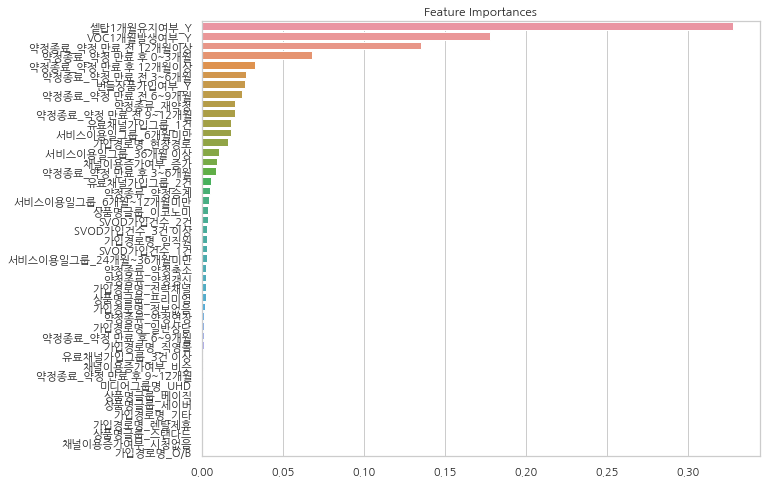

In [ ]:
ftr_importances_values = gtb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = test_X4.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
sns.barplot(x = ftr_importances, y = ftr_importances.index);

In [ ]:
# TOTAL_USED_DAYS를 통해 USED_TERM_BY_TOTAL_USED_DAYS 컬럼을 생성
df.loc[df['TOTAL_USED_DAYS'] < 180, 'USED_TERM_BY_TOTAL_USED_DAYS'] = '~6M'
df.loc[(df['TOTAL_USED_DAYS'] >= 180) & (df['TOTAL_USED_DAYS'] < 360), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '6M~12M'
df.loc[(df['TOTAL_USED_DAYS'] >= 360) & (df['TOTAL_USED_DAYS'] < 720), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '12M~24M'
df.loc[(df['TOTAL_USED_DAYS'] >= 720) & (df['TOTAL_USED_DAYS'] < 1080), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '24M~36M'
df.loc[df['TOTAL_USED_DAYS'] >= 1080, 'USED_TERM_BY_TOTAL_USED_DAYS'] = '36M~'

In [ ]:
# SVC_USE_DAYS_GRP을 통해 USED_TERM_BY_SVC_USE_DAYS_GRP 컬럼을 생성
df.loc[df['SVC_USE_DAYS_GRP'] == '6개월미만', 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '~6M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '6개월~12개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '6M~12M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '12개월~24개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '12M~24M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '24개월~36개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '24M~36M'
df.loc[df['SVC_USE_DAYS_GRP'] >= '36개월 이상', 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '36M~'

In [ ]:
df.head()

In [ ]:
df1 = df.loc[:,['USED_TERM_BY_TOTAL_USED_DAYS']]
df2 = df.loc[:,['USED_TERM_BY_SVC_USE_DAYS_GRP']]

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
df_concat = pd.concat([df1,df2], axis=1)

In [ ]:
df_concat.head()

In [ ]:
df_concat.loc[df_concat['USED_TERM_BY_TOTAL_USED_DAYS'] == df_concat['USED_TERM_BY_SVC_USE_DAYS_GRP'], 'TF'] = 'True'
df_concat.head()

In [ ]:
df_compare = df_concat[df_concat['TF'].isnull()]
df_compare.to_excel('/home/ljy1115/project/df_compare.xlsx', sheet_name='new_name')

# 끝